<a href="https://www.kaggle.com/code/brmil07/bank-stock-price-forecasting?scriptVersionId=163833002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Bank Stock Price Forecasting 💹**
---
This dataset contains historical stock price data for major banks from the year 2014 to 2024. The dataset includes daily stock prices, trading volume, and other relevant financial metrics for prominent banks. The stock prices are provided in IDR (Indonesian Rupiah) currency.

# **Preparation Phase 🧺**
---
## **Install the Libraries 📚**
---

In [1]:
# Install the scalecast library at the begininng
!pip install scalecast --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.7 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.19.8-py3-none-any.whl size=125274 sha256=5885eae56c5ec1d943782ebe4f51f290bd55258735411eba76582b7f9d649980
  Stored in directory: /root/.cache/pip/wheels/ac/67/2e/0244bcec7f41d76aae4c4196b64d31a20d474a7d5468f3d67e
Successfully built scalecast
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uni

## **Import the Libraries 🏪**
---

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-stock-price/Bank_Stock_Price_10Y.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scalecast.Forecaster import Forecaster

from sklearn.linear_model import Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Load the dataset 🗄️**
---

In [4]:
df = pd.read_csv('/kaggle/input/bank-stock-price/Bank_Stock_Price_10Y.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2483 non-null   object 
 1   Open       2483 non-null   float64
 2   High       2483 non-null   float64
 3   Low        2483 non-null   float64
 4   Close      2483 non-null   float64
 5   Adj Close  2483 non-null   float64
 6   Volume     2483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.9+ KB


In [6]:
df.head()

Date    Open    High     Low   Close    Adj Close     Volume
0  2014-02-03  1980.0  2000.0  1965.0  1965.0  1691.382568   55407000
1  2014-02-04  1970.0  1980.0  1940.0  1970.0  1695.686035   83683500
2  2014-02-05  1980.0  1990.0  1965.0  1990.0  1712.901367   42715000
3  2014-02-06  1975.0  2030.0  1970.0  2030.0  1747.331299   63581000
4  2014-02-07  2050.0  2060.0  2035.0  2050.0  1764.546753  104825500

In [7]:
# Check for missing values
df.isna().sum()

# Locate NaN values in the 'Price' column
# nan_rows = df[df['Volume'].isna()]
# print(nan_rows)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df1 = df[['Date','Adj Close']].copy(deep=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1.rename(columns={'Adj Close': 'Price'}, inplace=True)
df1 = df1.resample('W').mean()
df1.ffill(inplace=True)

In [9]:
df1[:10].style.background_gradient(cmap='viridis')

In [10]:
# Check for missing values
df1.isna().sum()

Price    0
dtype: int64

# **Exploratory Data Analysis 🔍**
---

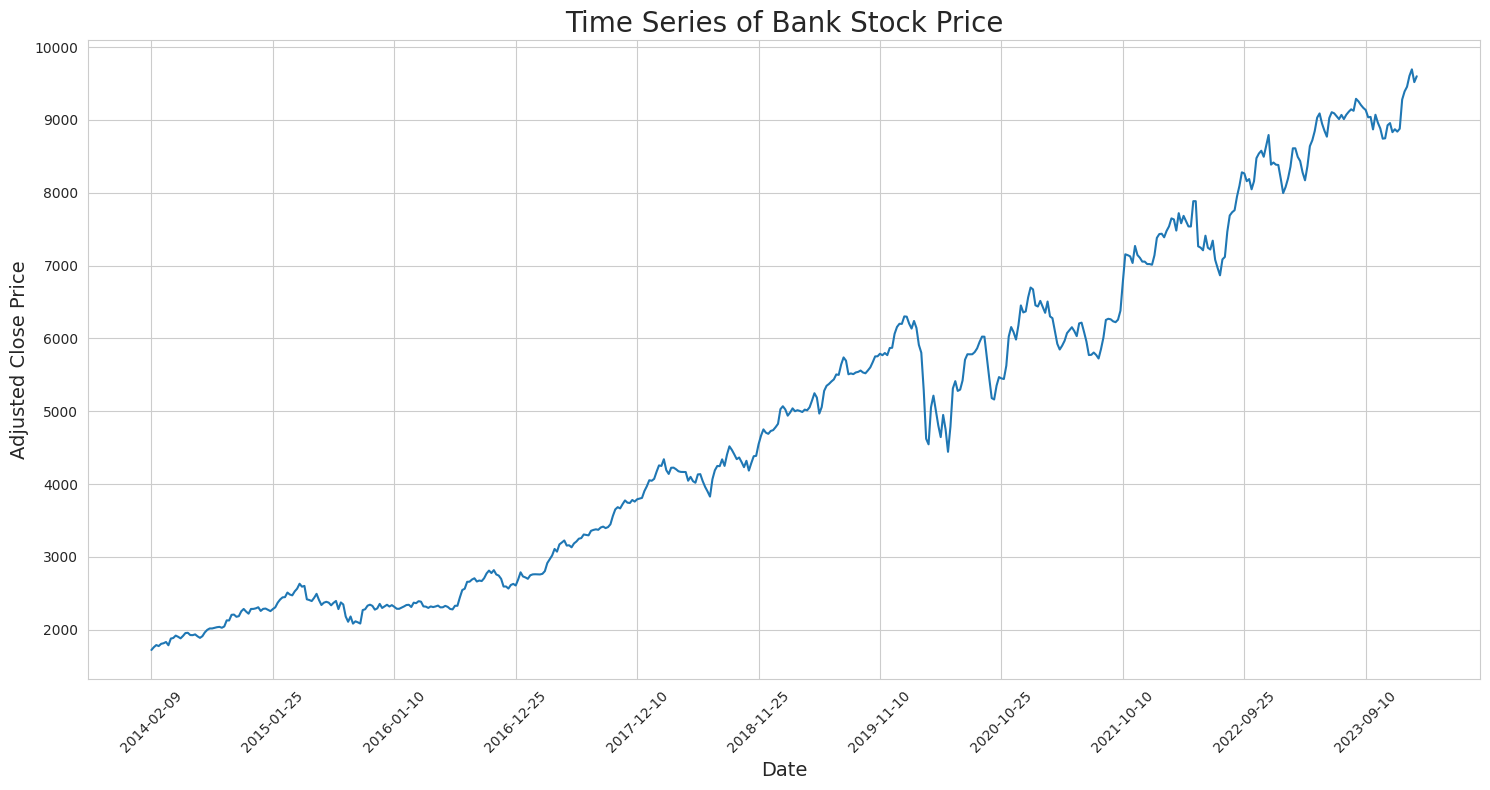

In [11]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
ax=sns.lineplot(data=df1, x=df1.index, y='Price')

# Set x-axis ticks for every 50th data point
n = 50  
plt.xticks(df1.index[::n])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.title("Time Series of Bank Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.tight_layout()
plt.show()

# **Stationarity Test 🧪**
---

In [12]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [13]:
def tsplot(y, lags=None, figsize=(15, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

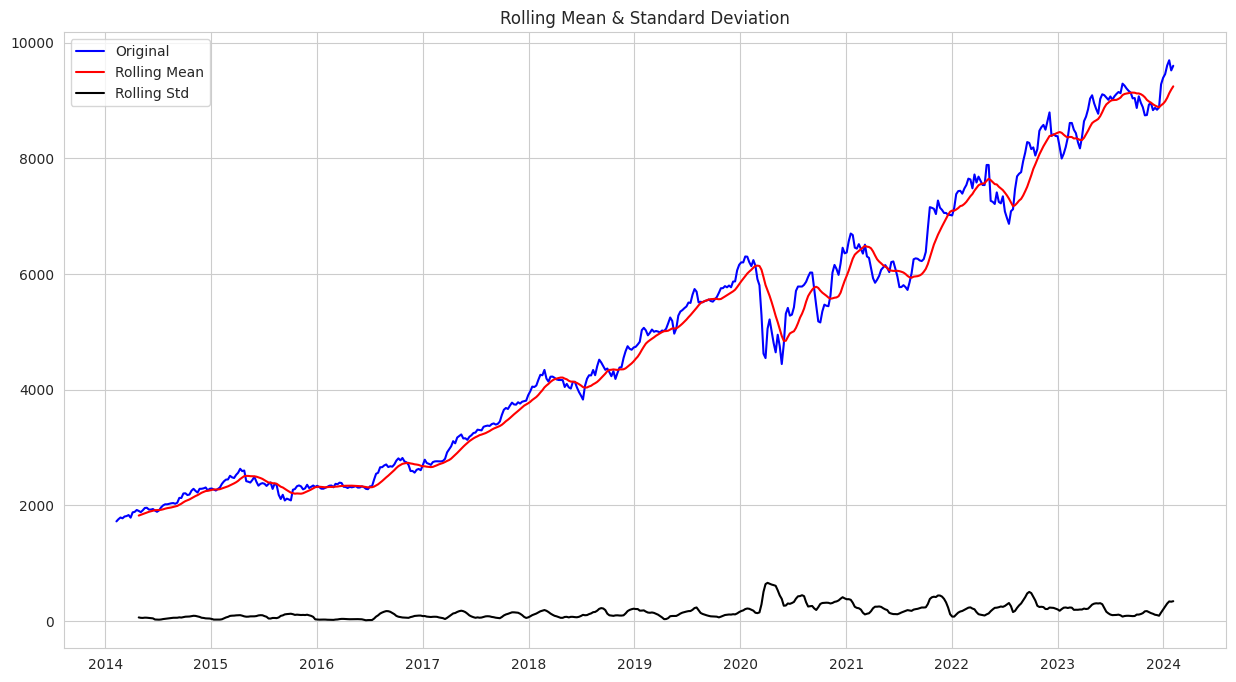

Results of Dickey-Fuller Test:
Test Statistic                   1.025763
p-value                          0.994530
#Lags Used                      17.000000
Number of Observations Used    504.000000
Critical Value (1%)             -3.443392
Critical Value (5%)             -2.867292
Critical Value (10%)            -2.569833
dtype: float64


In [14]:
test_stationarity(df1['Price'])

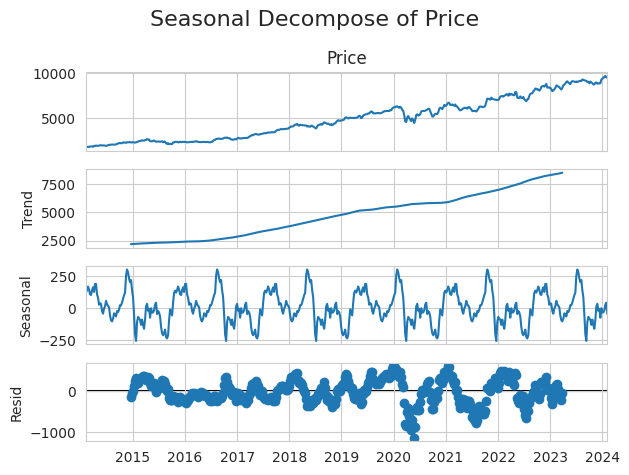

In [15]:
dec = sm.tsa.seasonal_decompose(df1['Price'], period=90).plot()

plt.suptitle('Seasonal Decompose of Price', fontsize=16)
plt.tight_layout()
plt.show()

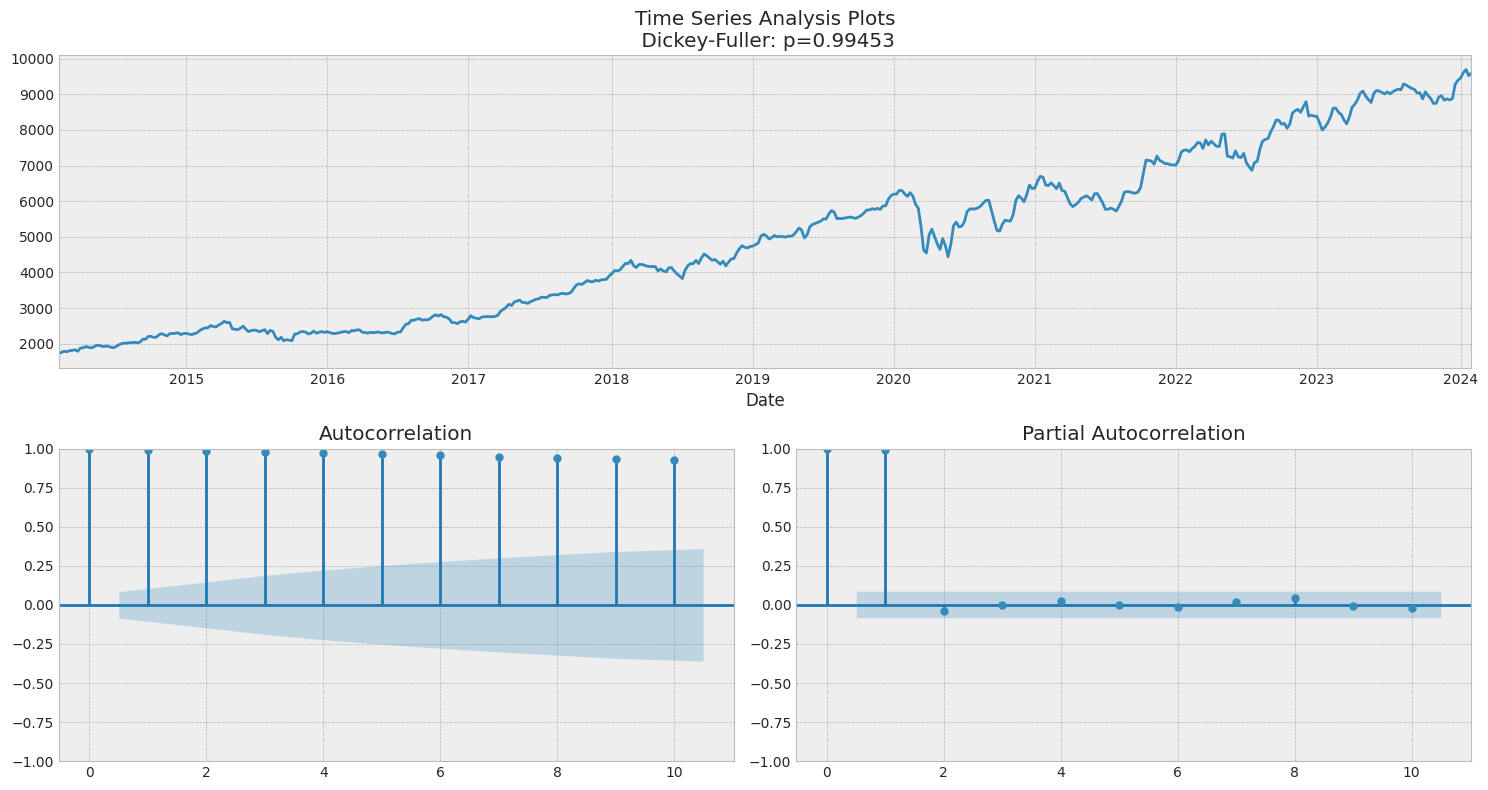

In [16]:
tsplot(df1['Price'], lags = 10)

A **p-value** of **0.9944530** from Dickey-Fuller Test indicates that the data is likely not stationary. For time series forecasting with stock price data, it is crucial to make the data stationary before feeding it into a machine learning model. 

Here are some common techniques to make time series data stationary:

* **Differencing**: Take the difference between consecutive observations. This can help remove trends or seasonality.
* **Transformation**: Apply transformations such as logarithmic transformation to stabilize the variance.
* **Detrending**: Remove a linear trend from the data.
* **Seasonal Adjustment**: Remove seasonal components from the data using techniques like seasonal decomposition.
* **Rolling Statistics**: Use moving averages or rolling standard deviations to stabilize variations in the data.

# **Data Transformation 🔨**
---

In [17]:
df2 = df1.copy()
df2.head()

Price
Date                   
2014-02-09  1722.369604
2014-02-16  1760.242798
2014-02-23  1789.508545
2014-03-02  1775.736426
2014-03-09  1806.723584

## **Method 1: Differencing 📏**
---

In [18]:
# Take the first difference
df2['Price_Diff'] = df2['Price'].diff()
df2.head()

Price  Price_Diff
Date                               
2014-02-09  1722.369604         NaN
2014-02-16  1760.242798   37.873194
2014-02-23  1789.508545   29.265747
2014-03-02  1775.736426  -13.772119
2014-03-09  1806.723584   30.987158

## **Method 2: Logarithmic Transformation 🪜**
---

In [19]:
df2['Price_Log'] = np.log(df2['Price'])
df2.head()

Price  Price_Diff  Price_Log
Date                                          
2014-02-09  1722.369604         NaN   7.451456
2014-02-16  1760.242798   37.873194   7.473207
2014-02-23  1789.508545   29.265747   7.489696
2014-03-02  1775.736426  -13.772119   7.481971
2014-03-09  1806.723584   30.987158   7.499270

## **Method 3: Detrending 📉**
---

In [20]:
df2['Price_Detrended'] = df2['Price'] - df2['Price'].rolling(window=30).mean()  # Adjust the window size as needed
df2.head()

Price  Price_Diff  Price_Log  Price_Detrended
Date                                                           
2014-02-09  1722.369604         NaN   7.451456              NaN
2014-02-16  1760.242798   37.873194   7.473207              NaN
2014-02-23  1789.508545   29.265747   7.489696              NaN
2014-03-02  1775.736426  -13.772119   7.481971              NaN
2014-03-09  1806.723584   30.987158   7.499270              NaN

## **Method 4: Seasonal Decompose ⚙️**
---

In [21]:
result_sd = seasonal_decompose(df2['Price'], model='additive', period=52)  # Assuming weekly seasonality, adjust period accordingly
df2['Price_Seasonal_Adjusted'] = df2['Price'] - result_sd.seasonal
df2.head()

Price  Price_Diff  Price_Log  Price_Detrended  \
Date                                                              
2014-02-09  1722.369604         NaN   7.451456              NaN   
2014-02-16  1760.242798   37.873194   7.473207              NaN   
2014-02-23  1789.508545   29.265747   7.489696              NaN   
2014-03-02  1775.736426  -13.772119   7.481971              NaN   
2014-03-09  1806.723584   30.987158   7.499270              NaN   

            Price_Seasonal_Adjusted  
Date                                 
2014-02-09              1556.145346  
2014-02-16              1592.903733  
2014-02-23              1585.888096  
2014-03-02              1588.273249  
2014-03-09              1667.476890

## **Method 5: Rolling Statistics 🎢**
---

In [22]:
window_size = 30  # Adjust the window size as needed
df2['Price_Rolling_Mean'] = df2['Price'].rolling(window=window_size).mean()
df2['Price_Rolling_Std'] = df2['Price'].rolling(window=window_size).std()
df2.head()

Price  Price_Diff  Price_Log  Price_Detrended  \
Date                                                              
2014-02-09  1722.369604         NaN   7.451456              NaN   
2014-02-16  1760.242798   37.873194   7.473207              NaN   
2014-02-23  1789.508545   29.265747   7.489696              NaN   
2014-03-02  1775.736426  -13.772119   7.481971              NaN   
2014-03-09  1806.723584   30.987158   7.499270              NaN   

            Price_Seasonal_Adjusted  Price_Rolling_Mean  Price_Rolling_Std  
Date                                                                        
2014-02-09              1556.145346                 NaN                NaN  
2014-02-16              1592.903733                 NaN                NaN  
2014-02-23              1585.888096                 NaN                NaN  
2014-03-02              1588.273249                 NaN                NaN  
2014-03-09              1667.476890                 NaN                NaN

## **Test the Stationarity of Transformed Data 🎡**
---

In [23]:
df2.isna().sum()

Price                       0
Price_Diff                  1
Price_Log                   0
Price_Detrended            29
Price_Seasonal_Adjusted     0
Price_Rolling_Mean         29
Price_Rolling_Std          29
dtype: int64

In [24]:
# Drop NaN values introduced by data transformation
df2.dropna(inplace=True)
df2.head()

Price  Price_Diff  Price_Log  Price_Detrended  \
Date                                                              
2014-08-31  2027.125952  -12.133350   7.614374       120.207970   
2014-09-07  2045.325879   18.199927   7.623312       127.642687   
2014-09-14  2128.525391   83.199511   7.663185       198.566112   
2014-09-21  2127.659033   -0.866357   7.662778       186.428072   
2014-09-28  2204.792041   77.133008   7.698388       249.259226   

            Price_Seasonal_Adjusted  Price_Rolling_Mean  Price_Rolling_Std  
Date                                                                        
2014-08-31              2061.815317         1906.917983          89.598752  
2014-09-07              2059.693306         1917.683192          85.989596  
2014-09-14              2144.001888         1929.959278          88.974617  
2014-09-21              2176.568680         1941.230961          91.937995  
2014-09-28              2274.751163         1955.532815          98.447424

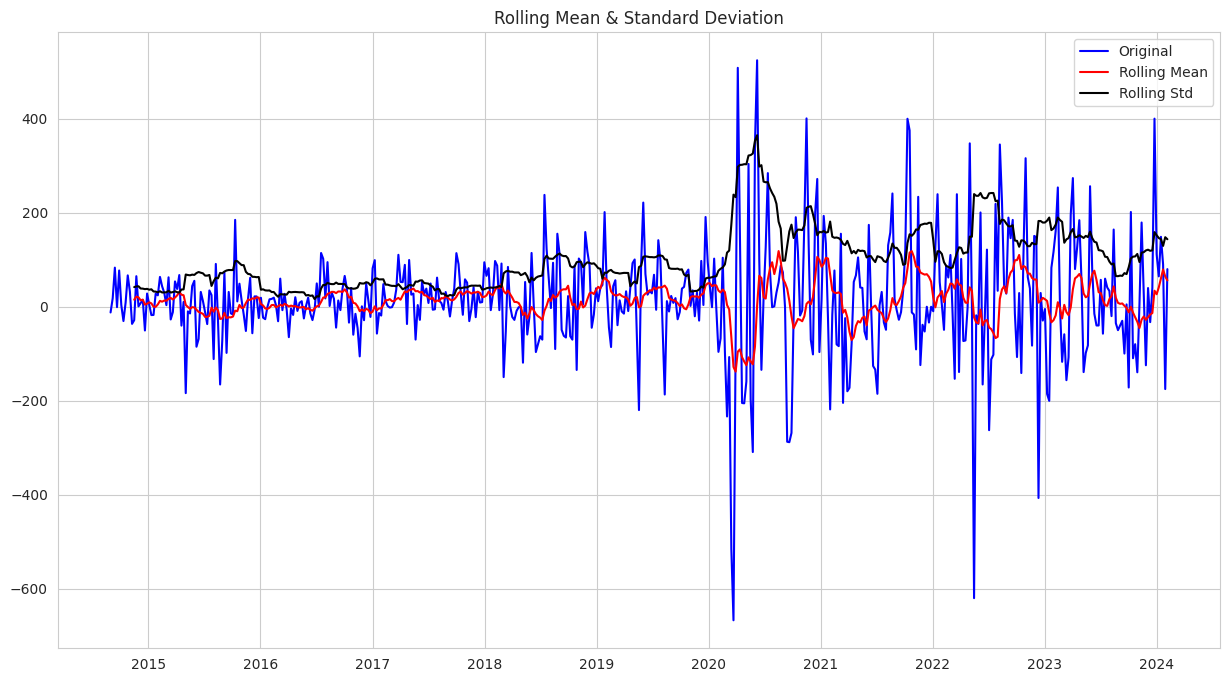

Results of Dickey-Fuller Test:
Test Statistic                -7.753459e+00
p-value                        9.878975e-12
#Lags Used                     1.600000e+01
Number of Observations Used    4.760000e+02
Critical Value (1%)           -3.444163e+00
Critical Value (5%)           -2.867631e+00
Critical Value (10%)          -2.570014e+00
dtype: float64


In [25]:
test_stationarity(df2['Price_Diff'])

A **p-value** of **2.508131e-12** from the Dickey-Fuller test strongly suggests that the differenced data is stationary. In statistical hypothesis testing, a p-value below a significance level (commonly 0.05) indicates strong evidence against the null hypothesis, which in this case would be that the data is non-stationary.

Given the extremely low p-value obtained, it's reasonable to conclude that the differenced data is stationary and suitable for use in a model. Utilizing this transformed data can be proceeded for time series modeling and forecasting.

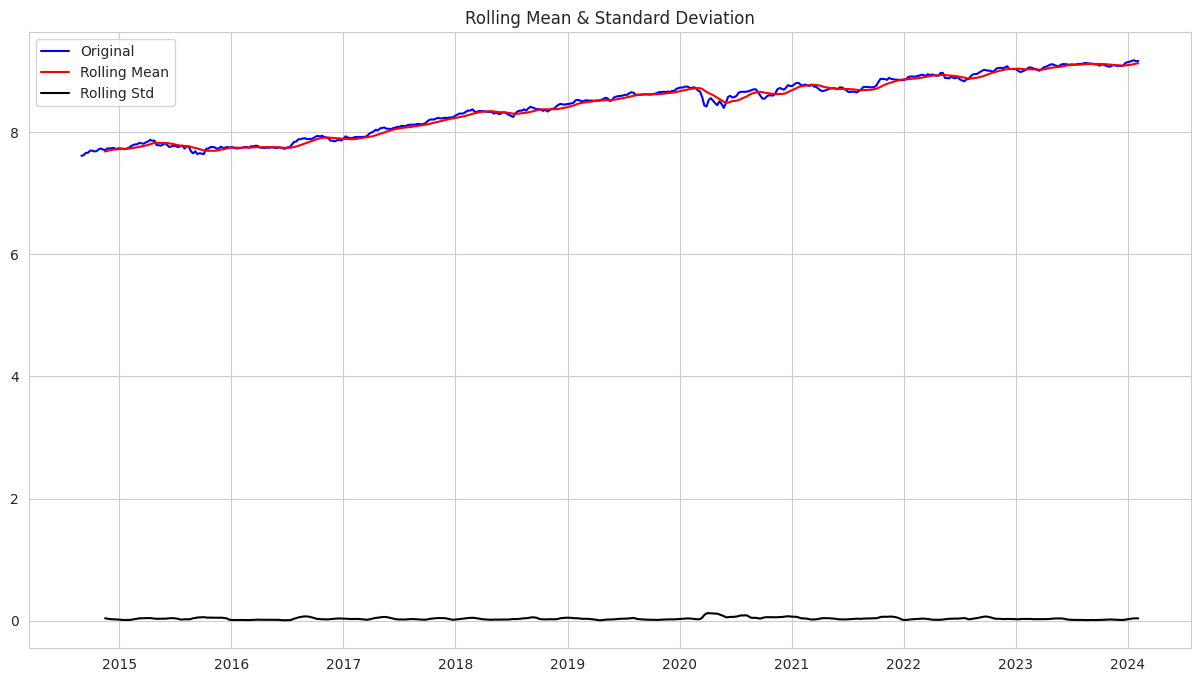

Results of Dickey-Fuller Test:
Test Statistic                  -0.616359
p-value                          0.867243
#Lags Used                       2.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64


In [26]:
test_stationarity(df2['Price_Log'])

A **p-value** of **0.867243** from the Dickey-Fuller test strongly suggests that the differenced data is still not stationary. Let's explore the next data transformation methods.

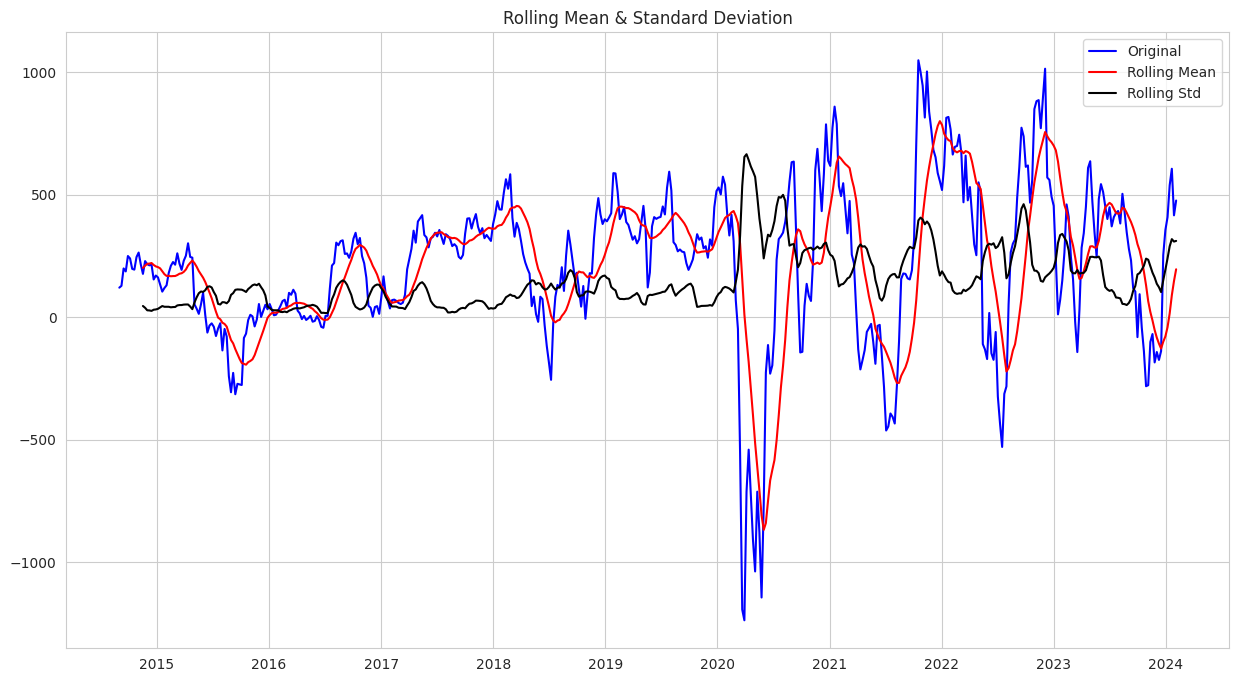

Results of Dickey-Fuller Test:
Test Statistic                -6.140943e+00
p-value                        7.974300e-08
#Lags Used                     9.000000e+00
Number of Observations Used    4.830000e+02
Critical Value (1%)           -3.443962e+00
Critical Value (5%)           -2.867543e+00
Critical Value (10%)          -2.569967e+00
dtype: float64


In [27]:
test_stationarity(df2['Price_Detrended'])

A **p-value** of **7.974300e-08** from the Dickey-Fuller test strongly suggests that the differenced data is stationary. This might be one of the candidate to feed in the model later.

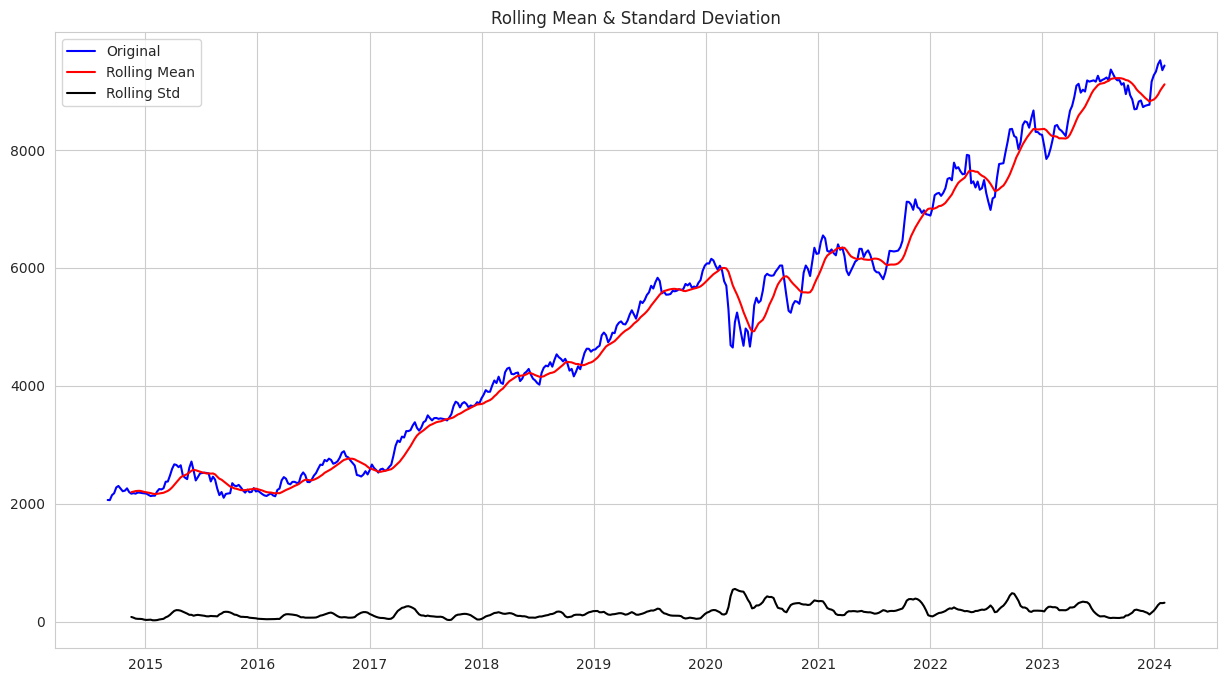

Results of Dickey-Fuller Test:
Test Statistic                   0.978618
p-value                          0.994035
#Lags Used                      17.000000
Number of Observations Used    475.000000
Critical Value (1%)             -3.444192
Critical Value (5%)             -2.867644
Critical Value (10%)            -2.570021
dtype: float64


In [28]:
test_stationarity(df2['Price_Seasonal_Adjusted'])

A **p-value** of **0.994035** from the Dickey-Fuller test strongly suggests that the differenced data is still not stationary. Let's explore the next data transformation methods.

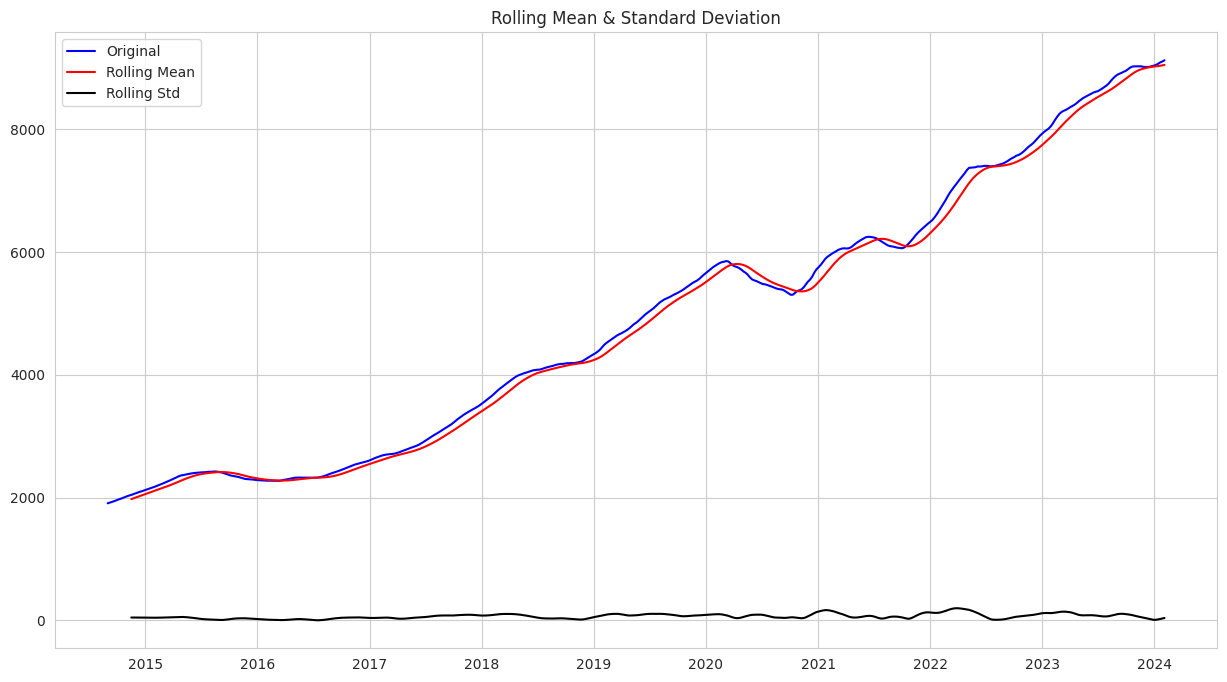

Results of Dickey-Fuller Test:
Test Statistic                   1.455138
p-value                          0.997351
#Lags Used                      14.000000
Number of Observations Used    478.000000
Critical Value (1%)             -3.444105
Critical Value (5%)             -2.867606
Critical Value (10%)            -2.570001
dtype: float64


In [29]:
test_stationarity(df2['Price_Rolling_Mean'])

A **p-value** of **0.997351** from the Dickey-Fuller test strongly suggests that the differenced data is still not stationary. Let's explore the next data transformation methods.

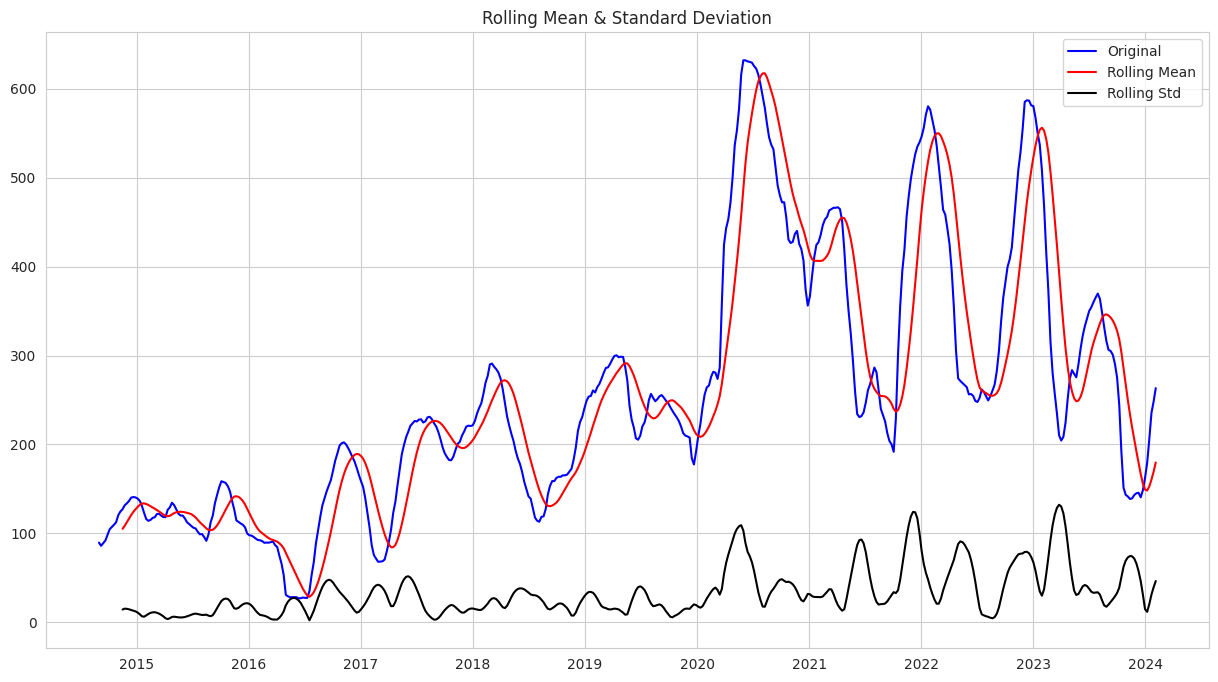

Results of Dickey-Fuller Test:
Test Statistic                  -3.672612
p-value                          0.004515
#Lags Used                       3.000000
Number of Observations Used    489.000000
Critical Value (1%)             -3.443794
Critical Value (5%)             -2.867469
Critical Value (10%)            -2.569928
dtype: float64


In [30]:
test_stationarity(df2['Price_Rolling_Std'])

A **p-value** of **0.004515** from the Dickey-Fuller test strongly suggests that the differenced data is stationary. This might be one of the candidate to feed in the model later.

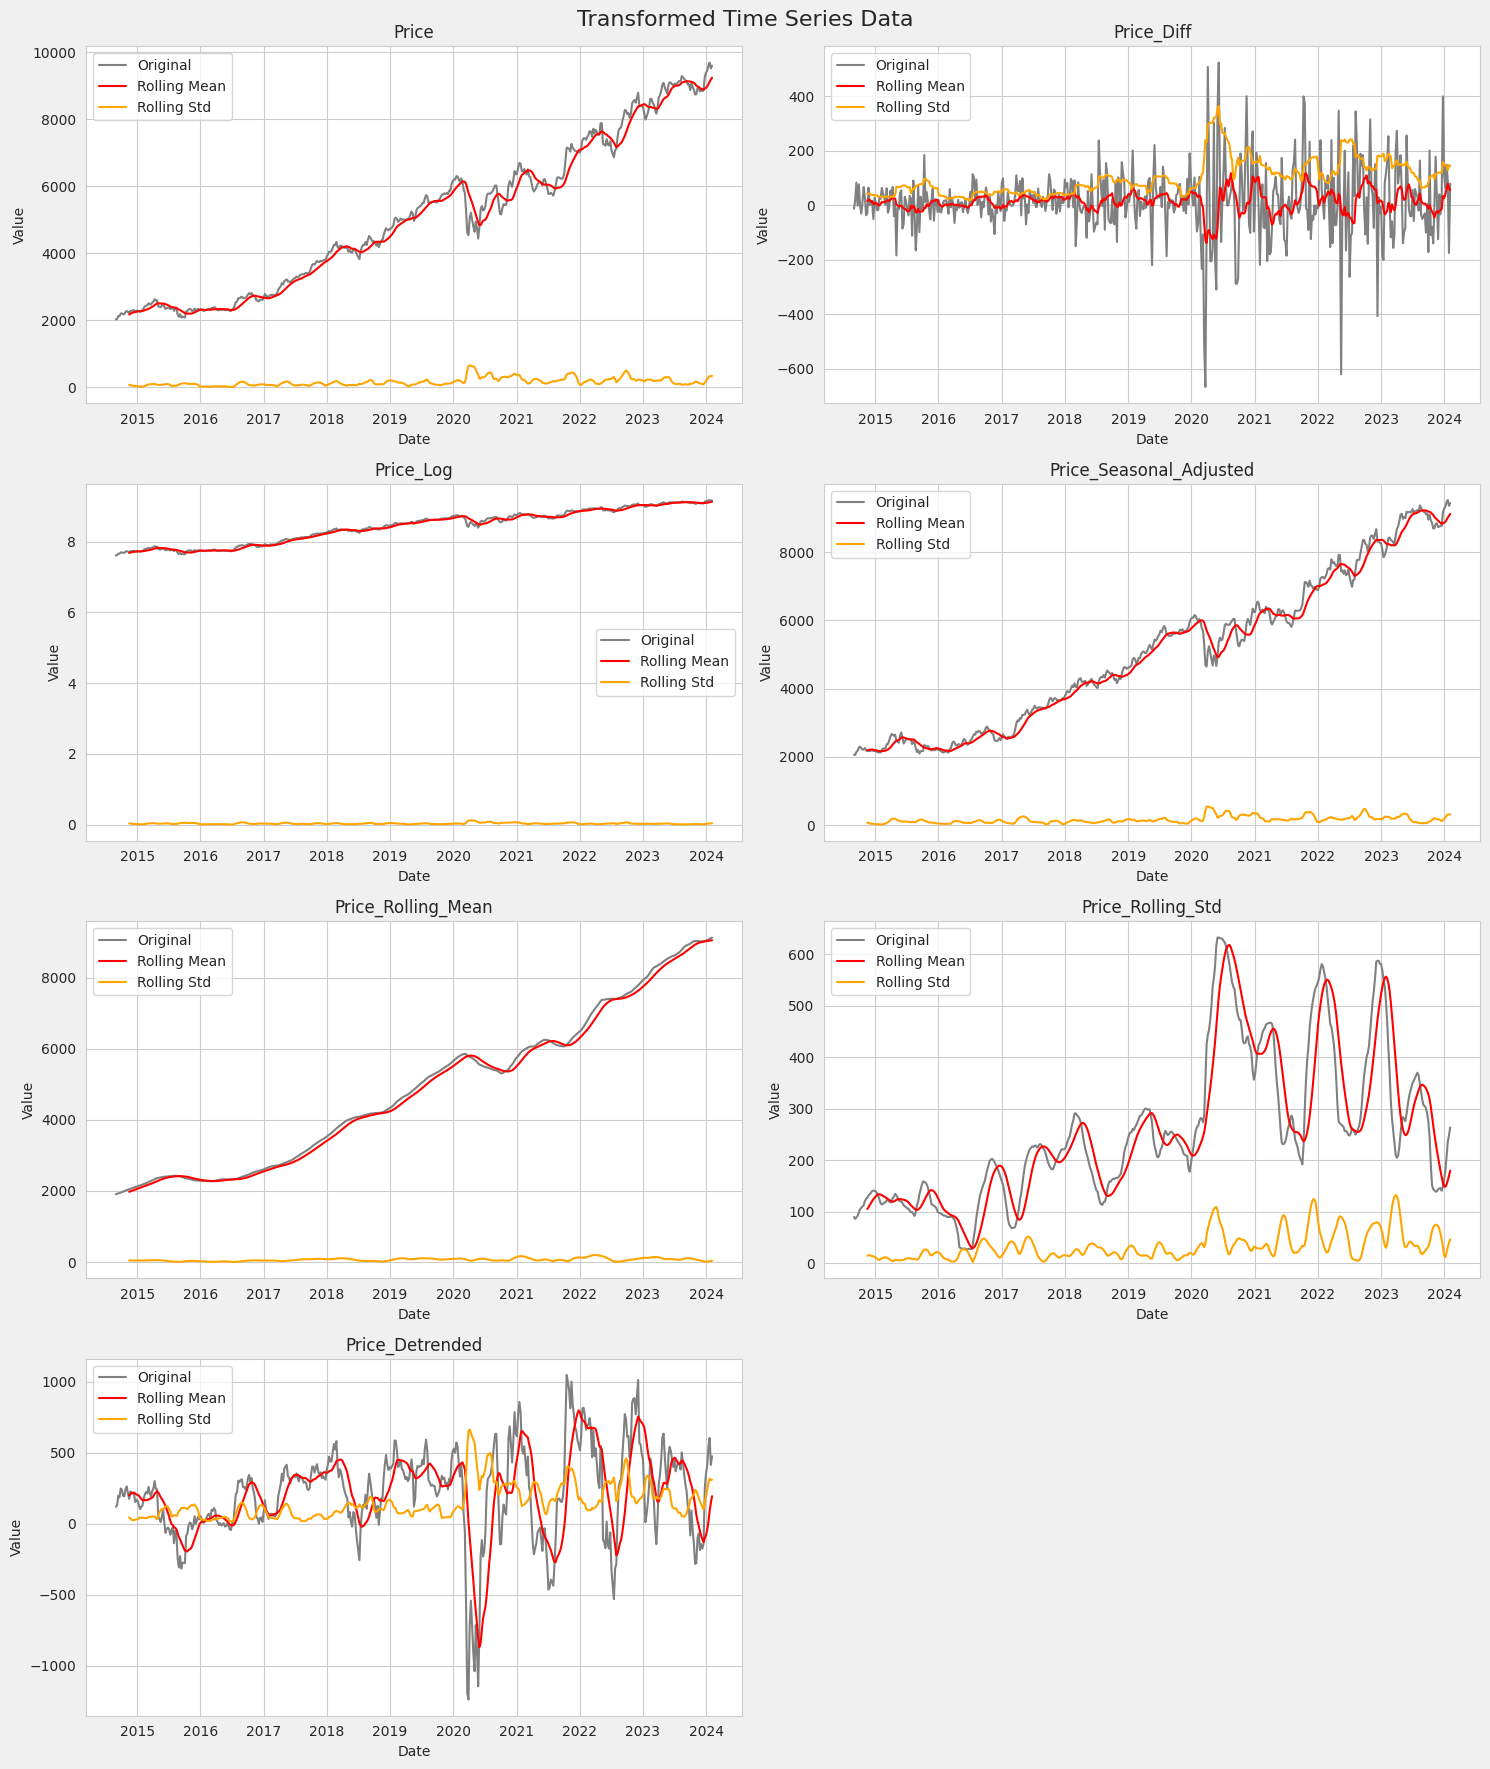

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(15, 18), facecolor='#f0f0f0')

# Flatten the axes
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['Price', 'Price_Diff', 'Price_Log', 'Price_Seasonal_Adjusted', 'Price_Rolling_Mean', 'Price_Rolling_Std', 'Price_Detrended']

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(df2.index, df2[col], label='Original', color='grey')

    # Calculate rolling statistics
    MA = df2[col].rolling(window=12).mean()
    MSTD = df2[col].rolling(window=12).std()

    ax.plot(df2.index, MA, color='red', label='Rolling Mean')
    ax.plot(df2.index, MSTD, color='orange', label='Rolling Std')

    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

# Hide any unused subplots
for i in range(len(columns_to_plot), 4 * 2):
    fig.delaxes(axes[i])

plt.suptitle("Transformed Time Series Data", size=16)
plt.tight_layout()
plt.show()

# **Build the Model 🤖**
---

In [32]:
# Let's use the transformed data for this model
Price = df2.Price_Detrended  # Adjust the chosen column as needed
Dates = df2.index

In [33]:
f = Forecaster(y=Price, current_dates=Dates)

f.set_test_length(0.25)
f.generate_future_dates(90) # Make the prediction for 90 days ahead

In [34]:
f

Forecaster(
    DateStartActuals=2014-08-31T00:00:00.000000000
    DateEndActuals=2024-02-04T00:00:00.000000000
    Freq=W-SUN
    N_actuals=493
    ForecastLength=90
    Xvars=[]
    TestLength=123
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

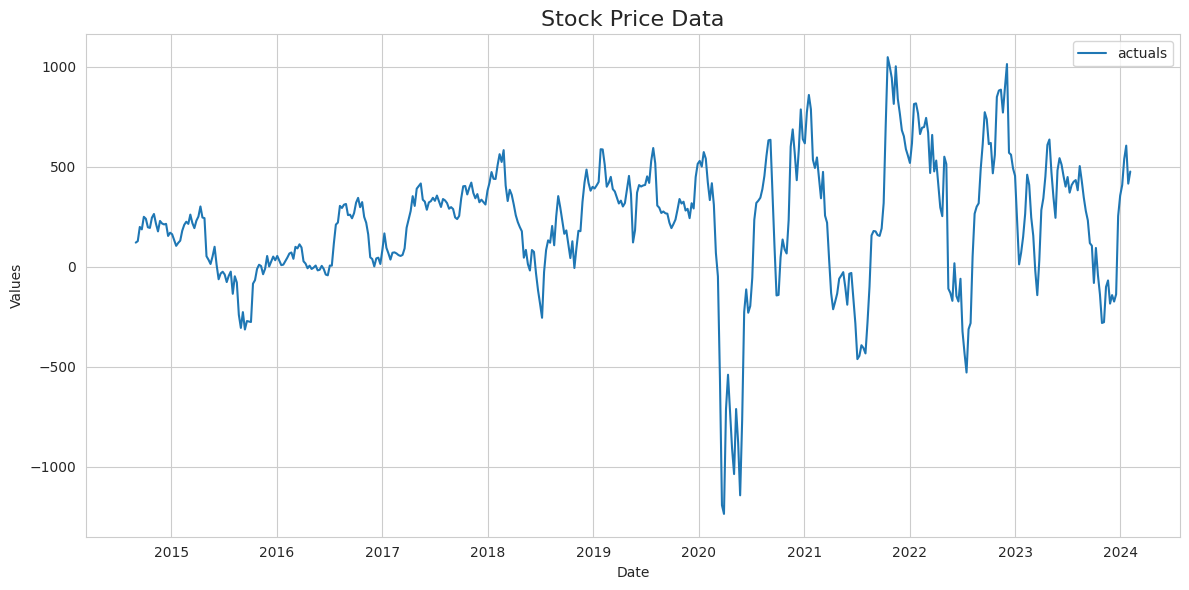

In [35]:
f.plot()
plt.title('Stock Price Data', size=16)
plt.tight_layout()
plt.show()

## **Exploratory Data Analysis with Scalecast 🗻**
---

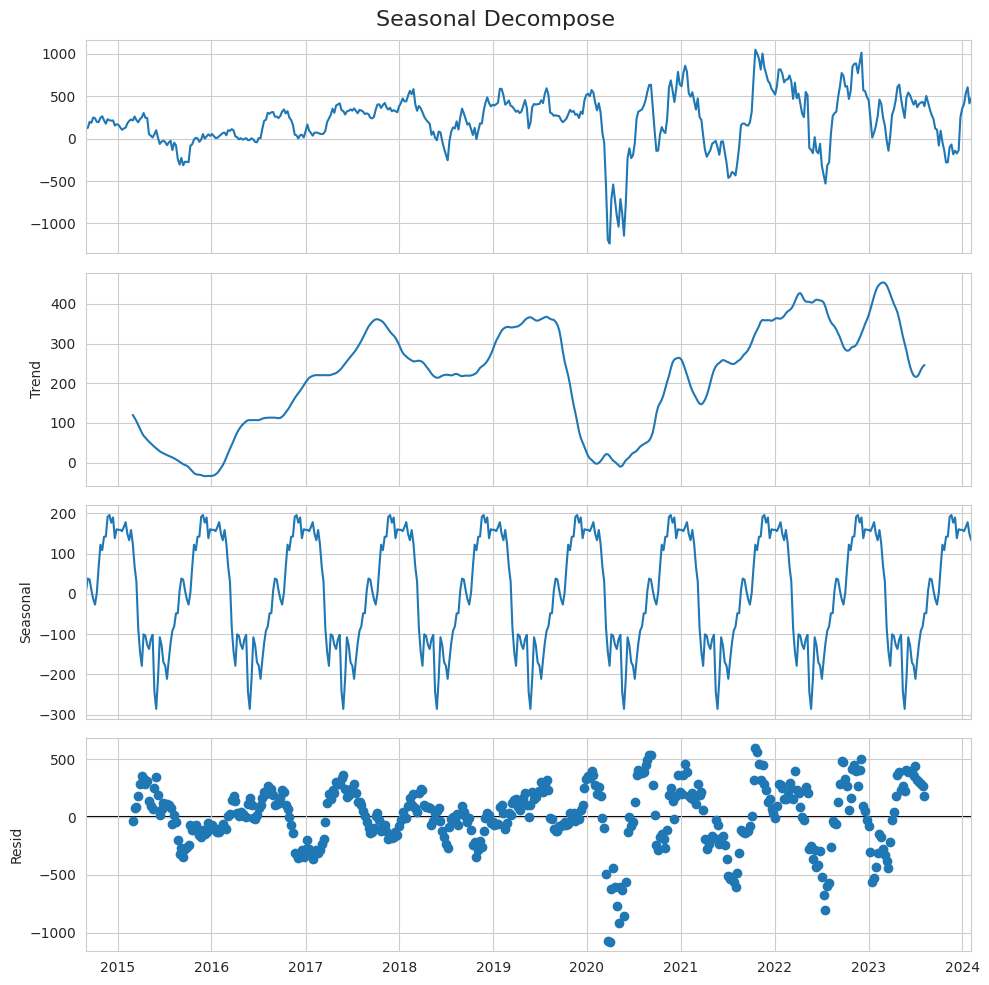

In [36]:
plt.rc("figure", figsize=(10,10))
f.seasonal_decompose().plot()
plt.suptitle('Seasonal Decompose', fontsize=16)
plt.tight_layout()
plt.show()

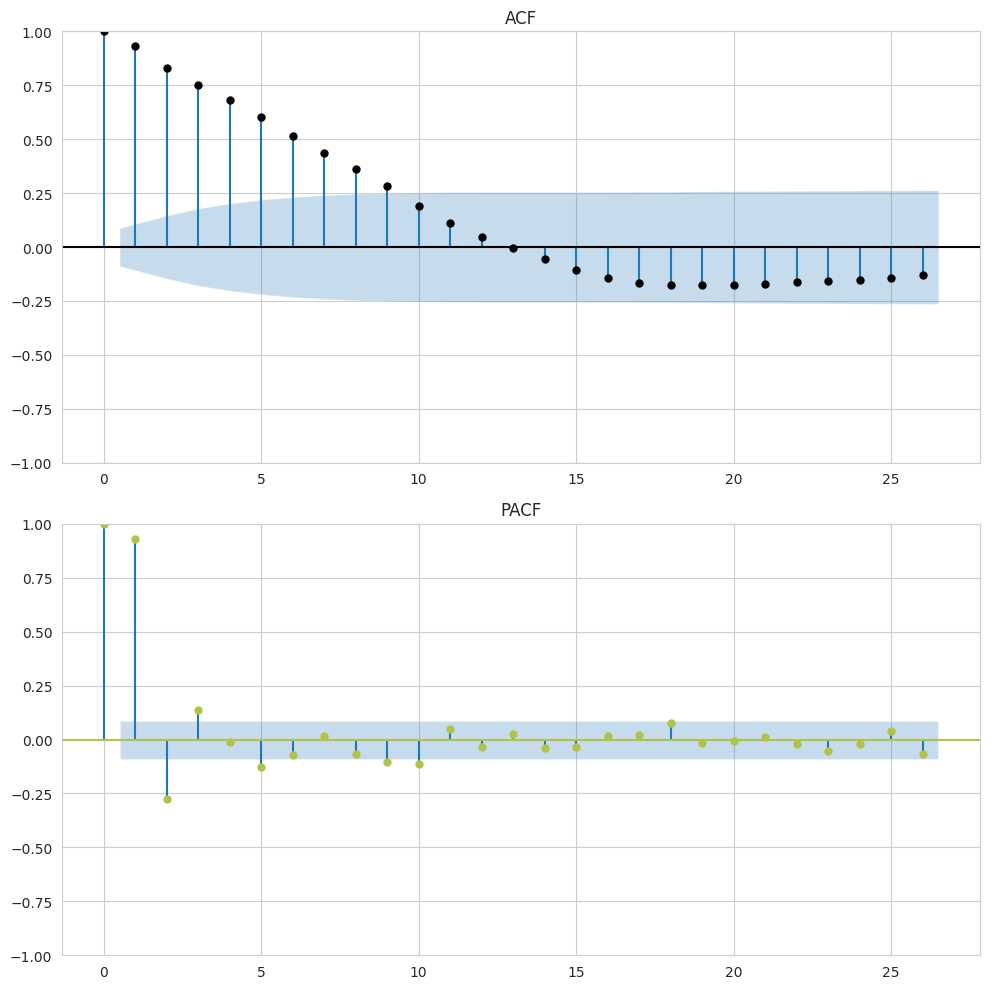

In [37]:
figs, axs = plt.subplots(2, 1, figsize=(10,10))
f.plot_acf(ax=axs[0], title='ACF', lags=26, color='black')
f.plot_pacf(ax=axs[1], title='PACF', lags=26, color='#B2C248', method='ywm')
plt.tight_layout()
plt.show()

## **LSTM**
---

2024-02-22 10:28:45.897952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 10:28:45.898119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 10:28:46.073265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


12/12 [==============================] - 0s 28ms/step


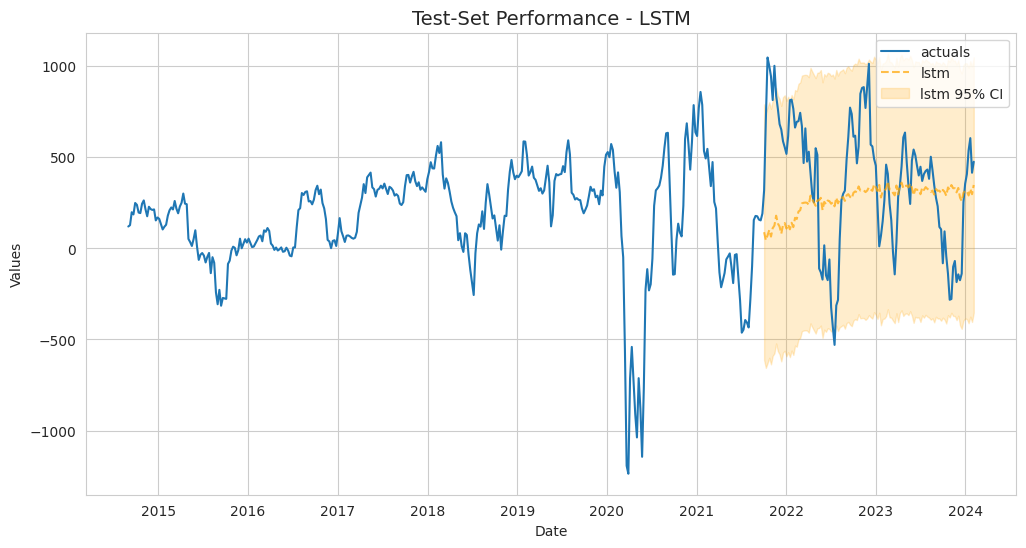

In [38]:
f.add_seasonal_regressors('week', raw=False, sincos=True)
f.set_estimator('lstm')
f.eval_cis(mode=True, cilevel=0.95)
f.manual_forecast(
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(100,)*3,
    dropout=(0,)*3,
    verbose=False
)

f.plot_test_set(models='lstm', ci=True)
plt.title('Test-Set Performance - LSTM', size=14)
plt.show()

# **Linear Scikit-Learn Models 📏**
---

## **MLR**
---

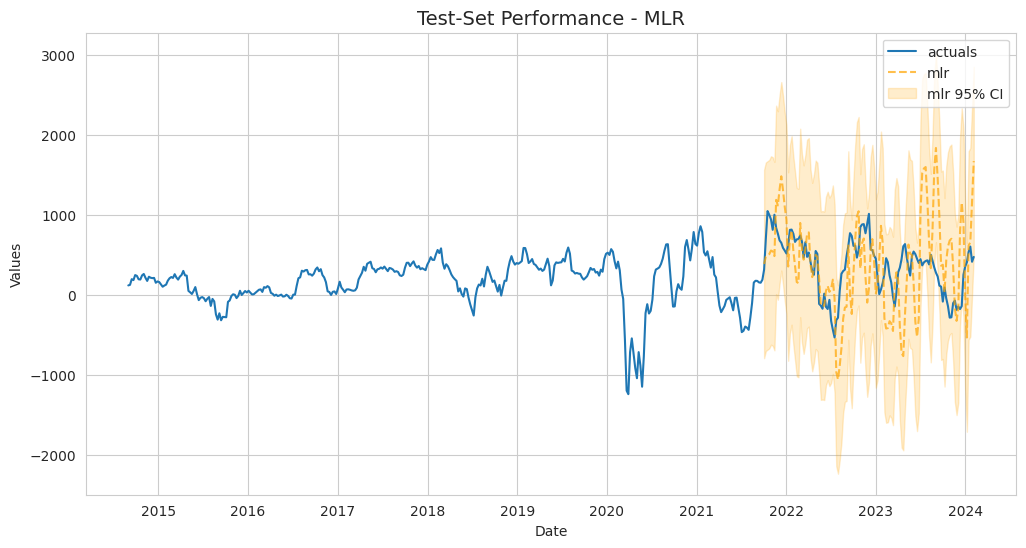

In [39]:
f.set_estimator('mlr') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_seasonal_regressors('year') 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='mlr', dynamic_testing=7)
f.plot_test_set(models='mlr', ci=True)
plt.title('Test-Set Performance - MLR', size=14)
plt.show()

## **Lasso**
---

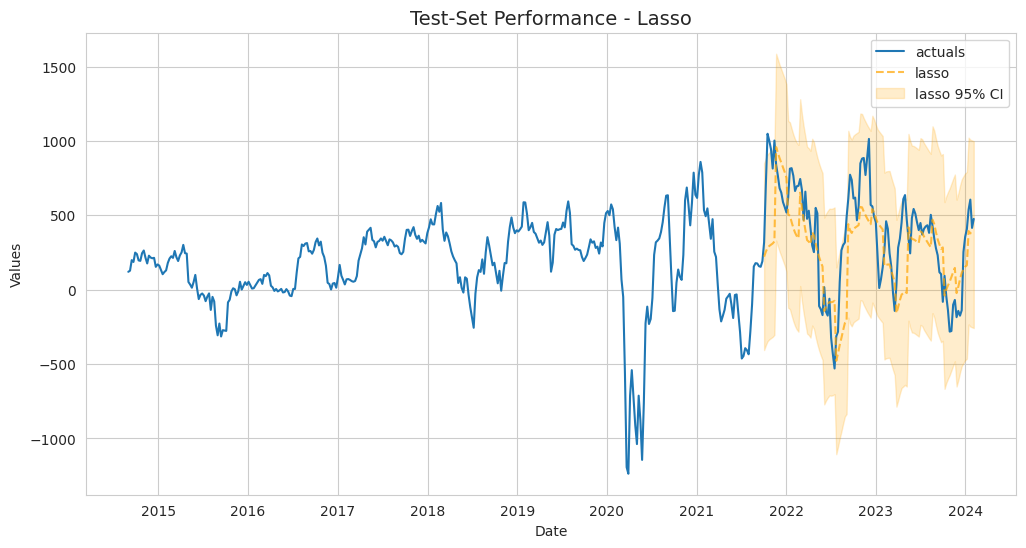

In [40]:
f.set_estimator('lasso') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month','quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='lasso', dynamic_testing=7)
f.plot_test_set(models='lasso', ci=True)
plt.title('Test-Set Performance - Lasso', size=14)
plt.show()

## **Ridge**
---

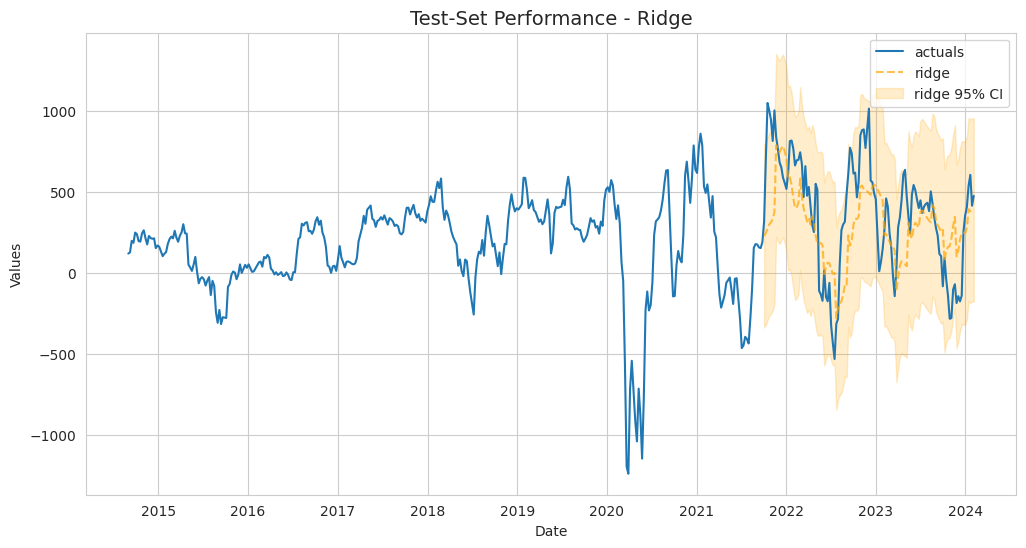

In [41]:
f.set_estimator('ridge') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='ridge', dynamic_testing=7)
f.plot_test_set(models='ridge', ci=True)
plt.title('Test-Set Performance - Ridge', size=14)
plt.show()

## **Elasticnet**
---

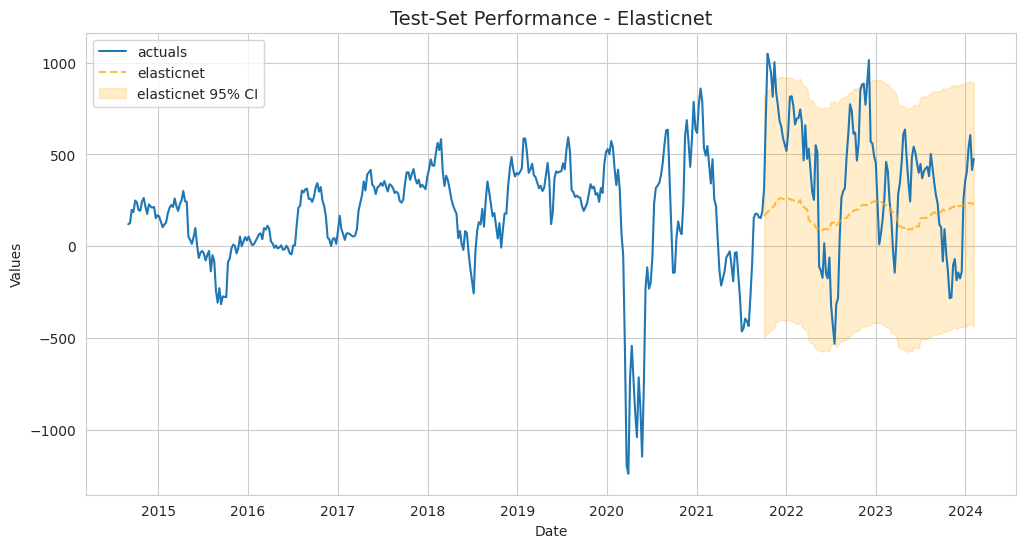

In [42]:
f.set_estimator('elasticnet') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='elasticnet', dynamic_testing=7)
f.plot_test_set(models='elasticnet', ci=True)
plt.title('Test-Set Performance - Elasticnet', size=14)
plt.show()

## **SGD**
---

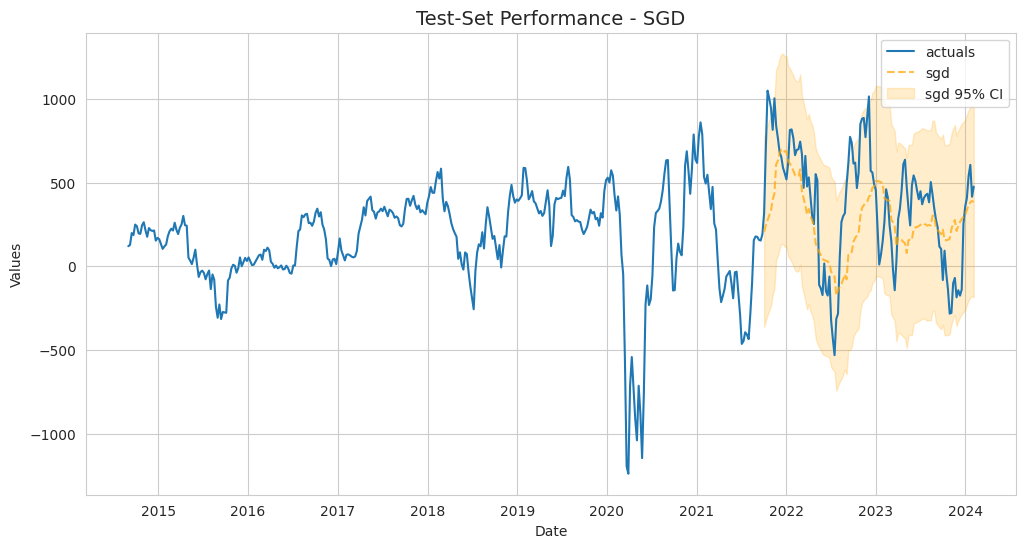

In [43]:
f.set_estimator('sgd') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='sgd', dynamic_testing=7)
f.plot_test_set(models='sgd', ci=True)
plt.title('Test-Set Performance - SGD', size=14)
plt.show()

## **Model Evaluation & Prediction 📝**
---

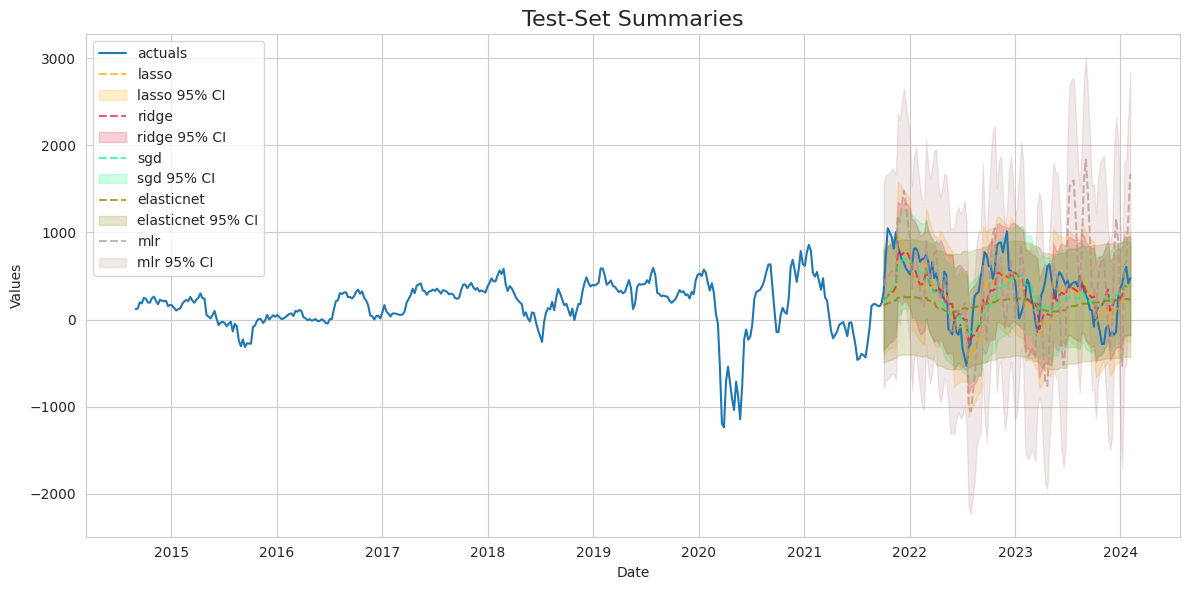

In [44]:
f.plot_test_set(ci=True, models=['mlr','lasso','ridge','elasticnet','sgd'], order_by='TestSetRMSE')
plt.title('Test-Set Summaries', fontsize=16)
plt.tight_layout()
plt.show()

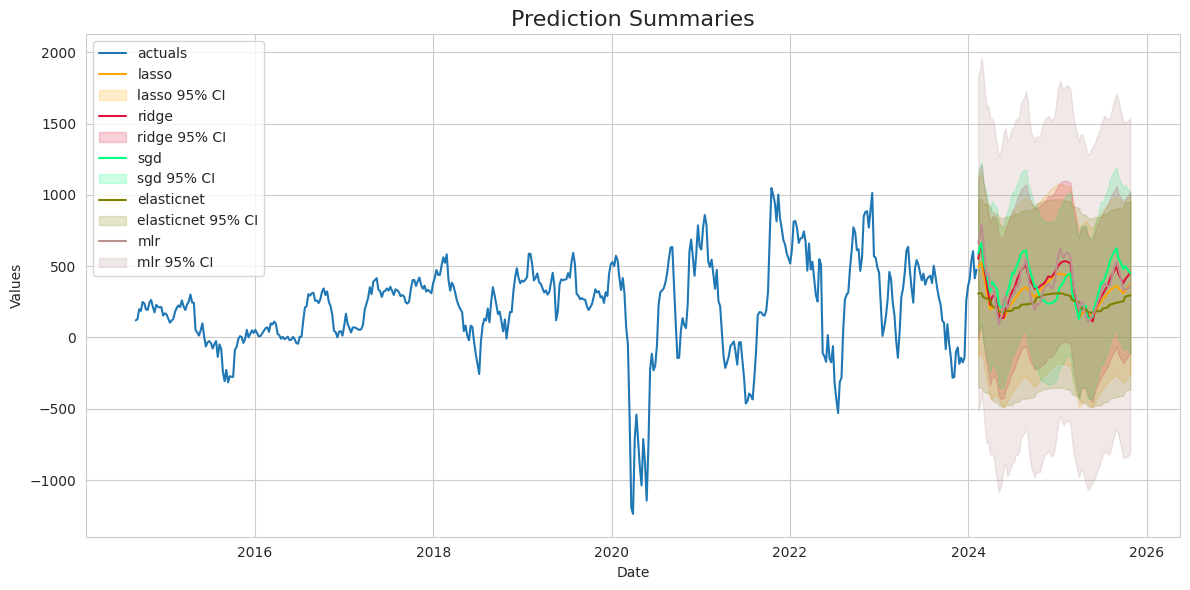

In [45]:
f.plot(ci=True, models=['mlr','lasso','ridge','elasticnet','sgd'], order_by='TestSetRMSE')
plt.title('Prediction Summaries', fontsize=16)
plt.tight_layout()
plt.show()

# **Non-linear Scikit-Learn Models 📐**
---

## **RF**
---

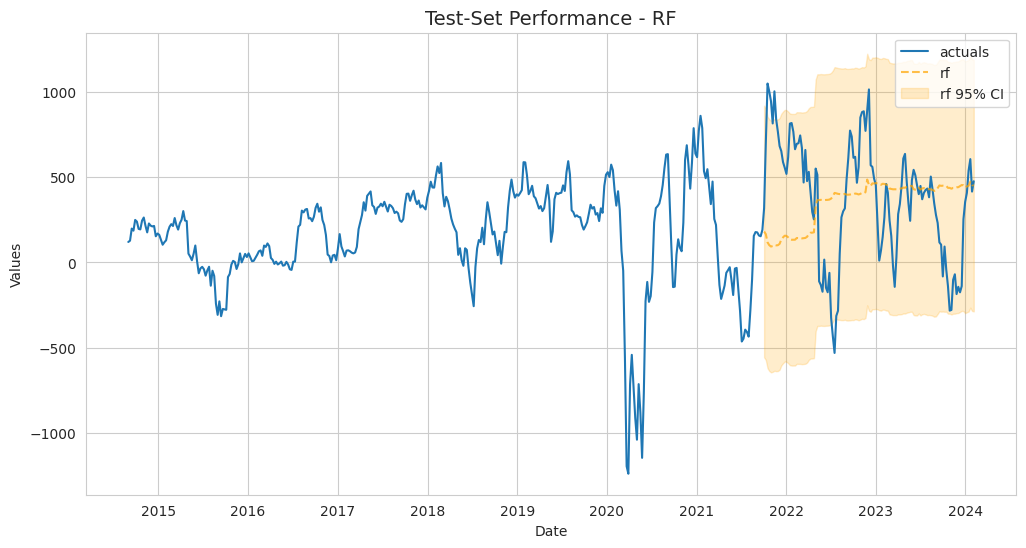

In [46]:
f.set_estimator('rf') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='rf', dynamic_testing=30, max_depth=30)
f.plot_test_set(models='rf', ci=True)
plt.title('Test-Set Performance - RF', size=14)
plt.show()

## **GBT**
---

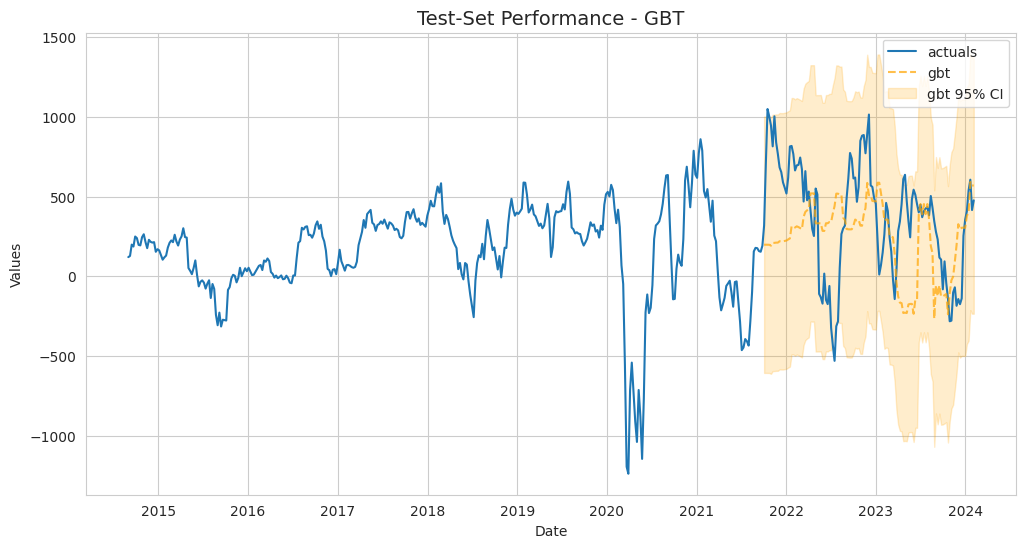

In [47]:
f.set_estimator('gbt') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month','quarter',dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='gbt', dynamic_testing=30, max_depth=30)
f.plot_test_set(models='gbt', ci=True)
plt.title('Test-Set Performance - GBT', size=14)
plt.show()

## **XGBoost**
---

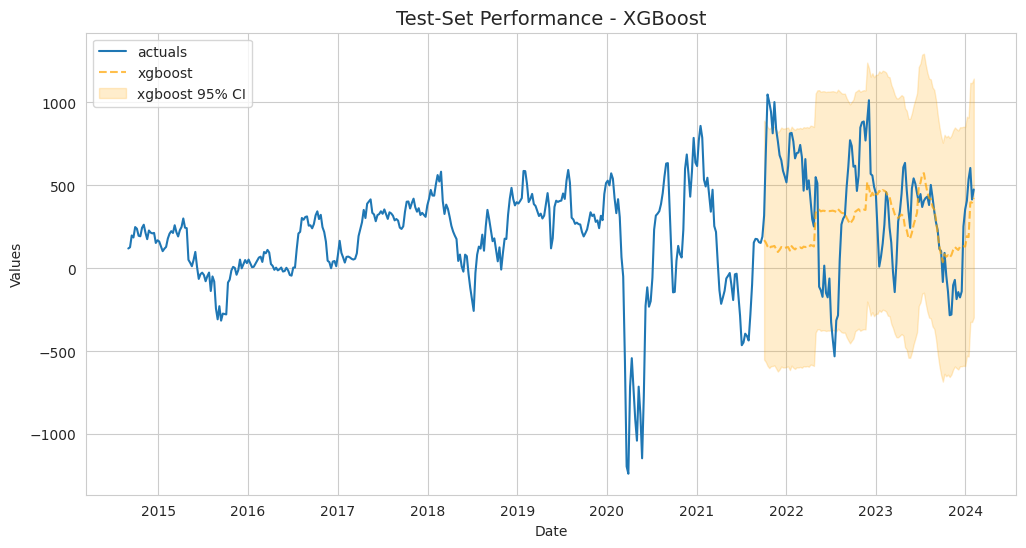

In [48]:
f.set_estimator('xgboost') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='xgboost', dynamic_testing=30, gamma=1)
f.plot_test_set(models='xgboost', ci=True)
plt.title('Test-Set Performance - XGBoost', size=14)
plt.show()

## **LightGBM**
---

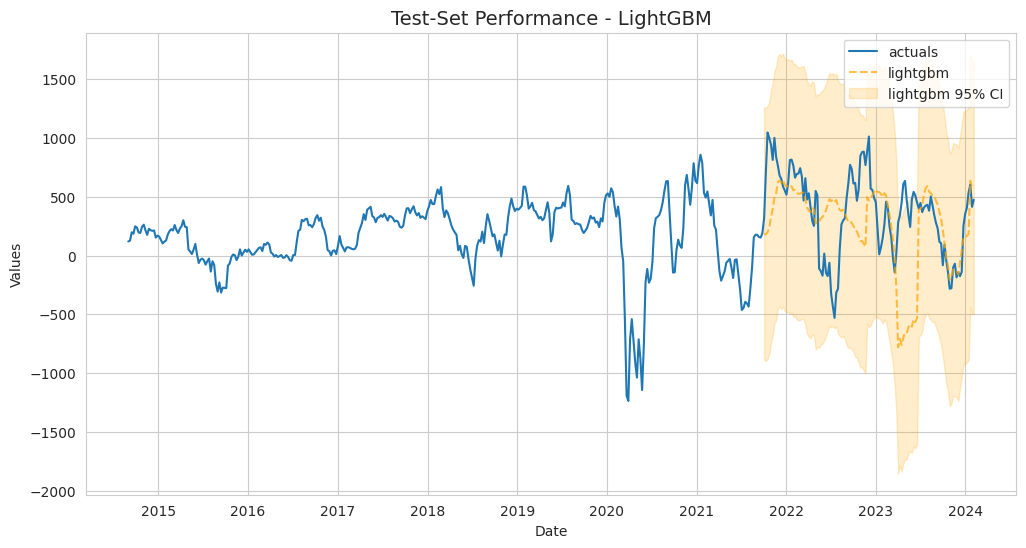

In [49]:
f.set_estimator('lightgbm') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='lightgbm', dynamic_testing=30, max_depth=3, num_leaves=10, force_col_wise=True, verbose=-1)
f.plot_test_set(models='lightgbm', ci=True)
plt.title('Test-Set Performance - LightGBM', size=14)
plt.show()

## **CatBoost**
---

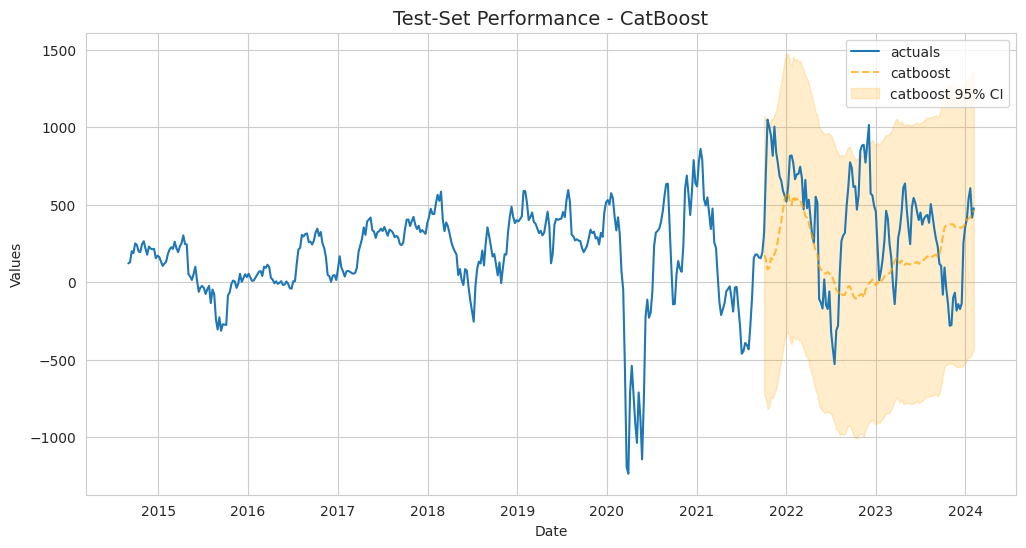

In [50]:
f.set_estimator('catboost')
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='catboost', depth=4, verbose=False)
f.plot_test_set(models='catboost', ci=True)
plt.title('Test-Set Performance - CatBoost', size=14)
plt.show()

## **KNN**
---

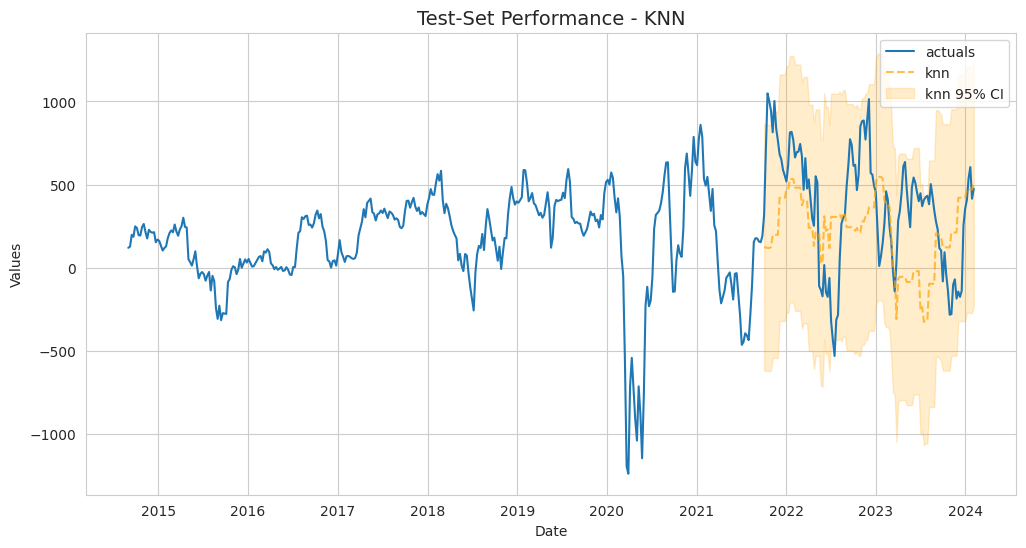

In [51]:
f.set_estimator('knn')
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='knn', n_neighbors=5, dynamic_testing=30)
f.plot_test_set(models='knn', ci=True)
plt.title('Test-Set Performance - KNN', size=14)
plt.show()

## **MLP**
---

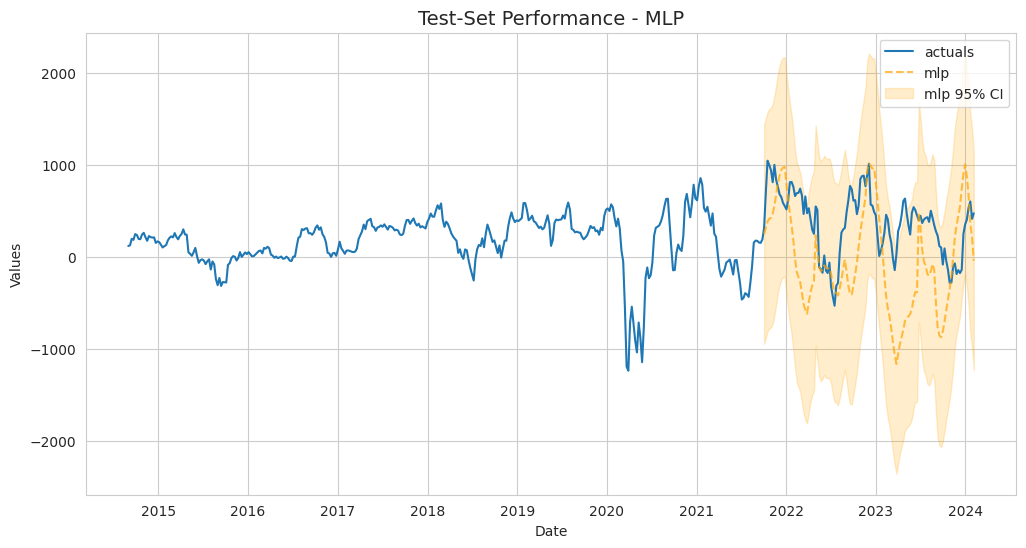

In [52]:
f.set_estimator('mlp')
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='mlp', hidden_layer_sizes=(50,50), solver='lbfgs', dynamic_testing=30)
f.plot_test_set(models='mlp', ci=True)
plt.title('Test-Set Performance - MLP', size=14)
plt.show()

## **Model Evaluation & Prediction 📝**
---

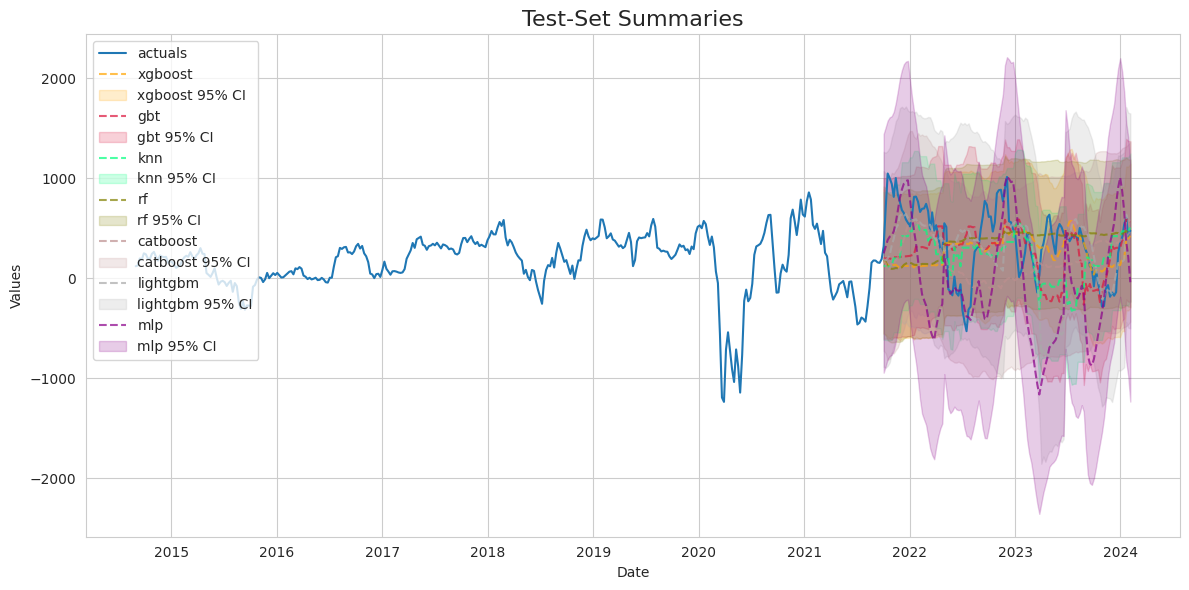

In [53]:
f.plot_test_set(
    ci=True,
    models=['rf','gbt','xgboost','lightgbm','catboost','knn','mlp'],
    order_by='TestSetRMSE'
)
plt.title('Test-Set Summaries', size=16)
plt.tight_layout()
plt.show()

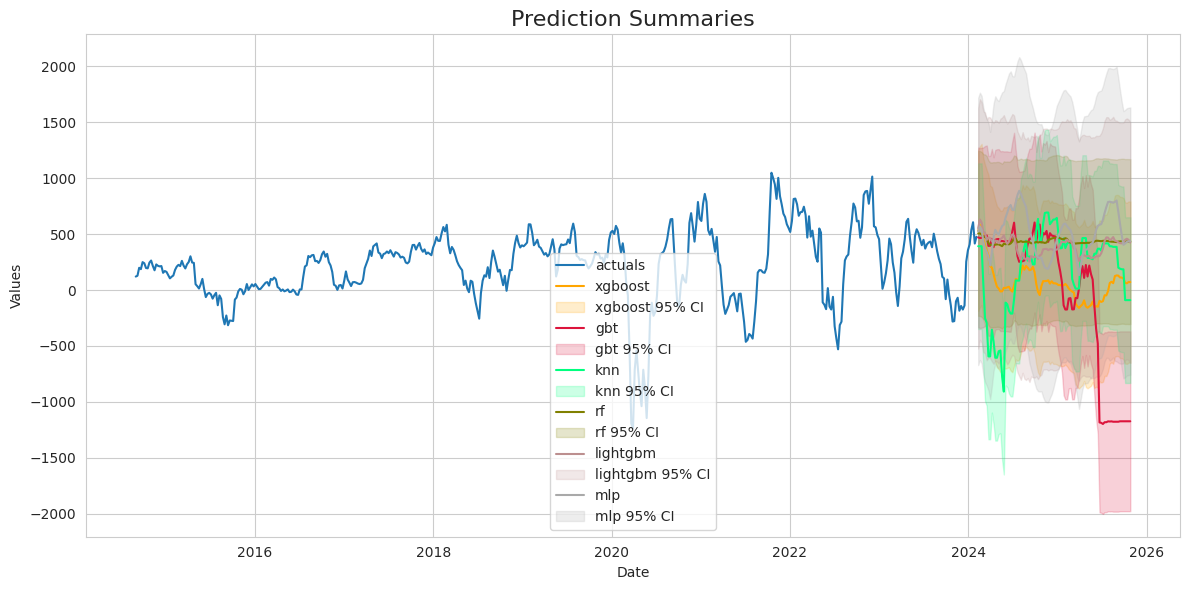

In [54]:
f.plot(ci=True,models=['rf','gbt','xgboost','lightgbm','knn','mlp'], order_by='TestSetRMSE')
plt.title('Prediction Summaries', size=16)
plt.tight_layout()
plt.show()

# **Explore Other Models 🛣️**
---

10:30:33 - cmdstanpy - INFO - Chain [1] start processing
10:30:33 - cmdstanpy - INFO - Chain [1] done processing
10:30:34 - cmdstanpy - INFO - Chain [1] start processing
10:30:34 - cmdstanpy - INFO - Chain [1] done processing


12/12 [==============================] - 0s 6ms/step


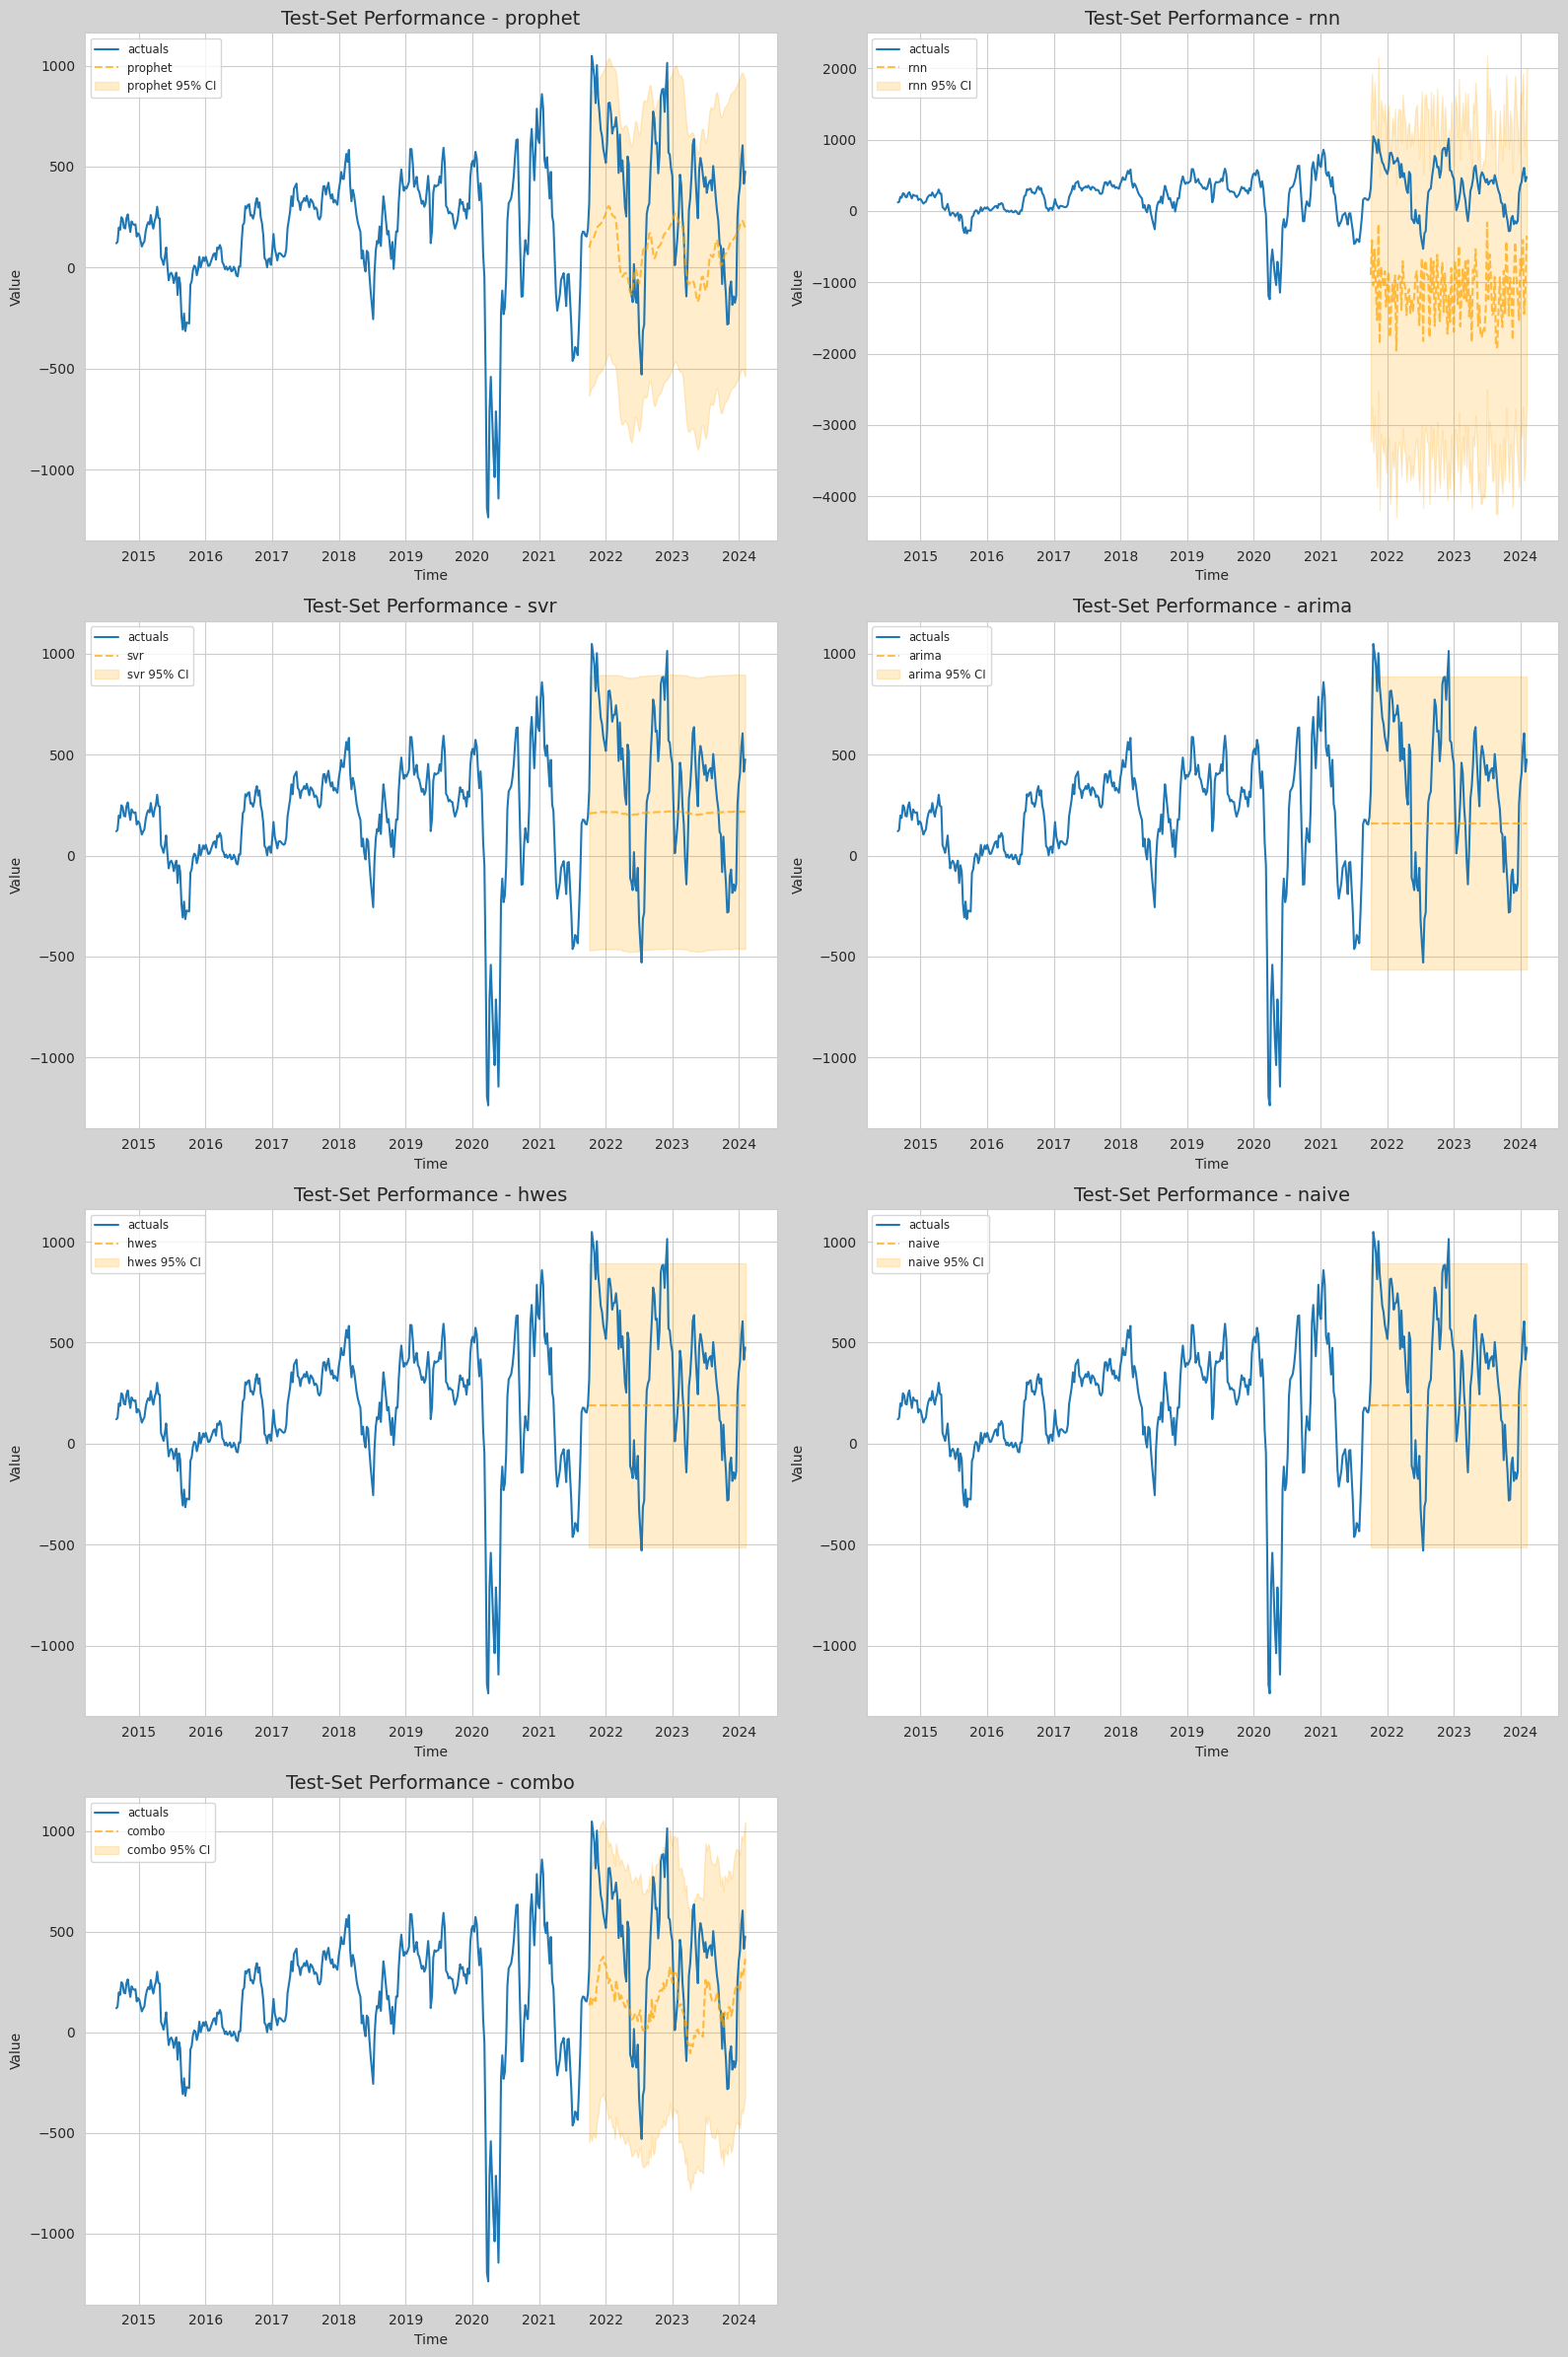

In [55]:
model_list = ['prophet','rnn','svr','arima','hwes','naive','combo']

num_rows = (len(model_list) + 1) // 2  # Number of rows needed for the subplot
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))
fig.set_facecolor('lightgrey')

for i, model in enumerate(model_list):
    row = i // 2
    col = i % 2
    
    f.set_estimator(model)
    f.add_ar_terms(7) 
    f.add_seasonal_regressors('quarter', dummy=True) 
    f.add_time_trend()
    f.eval_cis(mode=True, cilevel=0.95)
    f.manual_forecast(call_me=model, dynamic_testing=True)
    f.plot_test_set(models=model, ci=True, include_train=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Test-Set Performance - {model}', size=14)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Value')
    axs[row, col].grid(True)
    axs[row, col].legend(loc='upper left', fontsize='small')

# If there are any remaining subplots, remove them
for i in range(len(model_list), num_rows * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

# **Model Evaluation 📝**
---

In [56]:
results = f.export(dfs=['model_summaries','lvl_fcsts'], cis=True, to_excel=True)
model_summaries = results['model_summaries']
lvl_fcsts = results['lvl_fcsts'] 
ts_preds = f.export('lvl_test_set_predictions') 

In [57]:
model_eval = model_summaries[['ModelNickname','TestSetMAPE','TestSetRMSE','TestSetR2']].copy()

In [58]:
model_eval['Rank'] = model_eval['TestSetRMSE'].rank(ascending=True).astype(int)
model_eval.style.background_gradient(cmap='crest')

In [59]:
model_eval = model_eval.sort_values(by='Rank')
model_eval.style.background_gradient(cmap='viridis')

# **Make the Prediction 🔮**
---

In [60]:
# Filter the DataFrame based on rank
filtered_df = model_eval[model_eval['Rank'].between(1,5)]

# Extract the ModelNickname values as a list
best_model = filtered_df['ModelNickname'].tolist()
best_model

['lasso', 'ridge', 'sgd', 'elasticnet', 'svr']

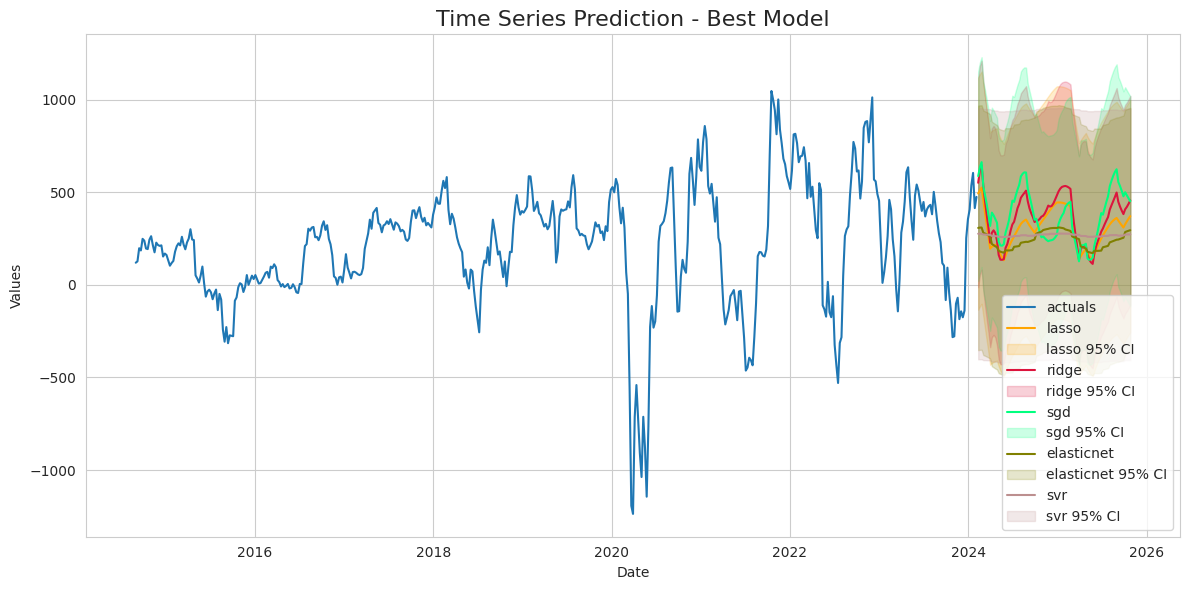

In [61]:
f.plot(models=best_model, order_by='TestSetR2', ci=True)
plt.title('Time Series Prediction - Best Model', size=16)
plt.tight_layout()
plt.show()

# **Model Stacking 📔**
---

In [62]:
f.add_sklearn_estimator(StackingRegressor, 'stacking')

In [63]:
estimators = [
    ('sgd', SGDRegressor()),
    ('ridge', Ridge(alpha=0.2)),
    ('mlr', Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ]))
]

final_estimator = Lasso(alpha=0.2)

f.set_estimator('stacking')
f.manual_forecast(
    estimators=estimators,
    final_estimator=final_estimator,
    dynamic_testing=13,
    verbose=False
)

In [64]:
f.add_signals(['sgd','ridge','mlr','lasso'], train_only=True)
f.set_estimator('sgd')
f.manual_forecast(call_me = 'sgd_stack', verbose=False)

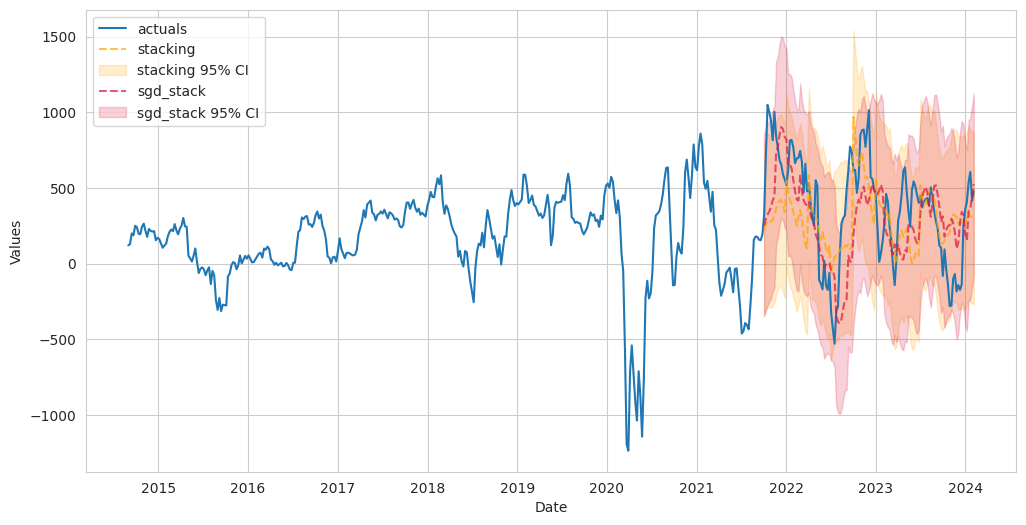

In [65]:
f.plot_test_set(models=['stacking','sgd_stack'], ci=True, order_by='TestSetRMSE')
plt.show()

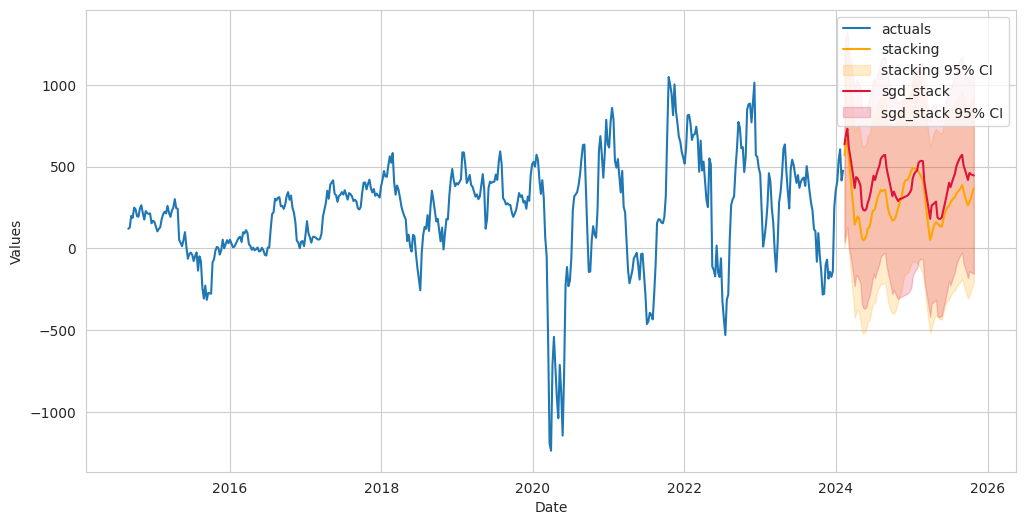

In [66]:
f.plot(models=['stacking','sgd_stack'], ci=True, order_by='TestSetRMSE')
plt.show()

In [67]:
stack_results = f.export(models=['stacking','sgd_stack'], cis=True, to_excel=True)
stack_model_summaries = stack_results['model_summaries']
stack_model_eval = stack_model_summaries[['ModelNickname','TestSetMAPE','TestSetRMSE','TestSetR2']].copy()
stack_model_eval['Rank'] = stack_model_eval['TestSetRMSE'].rank(ascending=True).astype(int)
stack_model_eval.style.background_gradient(cmap='crest')

In [68]:
predictions = f.export_Xvars_df(dropna=False)
df_predictions = pd.DataFrame(predictions)
df_predictions.tail()

DATE   weeksin   weekcos  AR1  AR2  AR3  AR4  AR5  AR6  AR7  ...  \
85 2025-09-28 -0.996050 -0.088796  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
86 2025-10-05 -0.999561  0.029633  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
87 2025-10-12 -0.989040  0.147647  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
88 2025-10-19 -0.964636  0.263587  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
89 2025-10-26 -0.926690  0.375828  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

    quarter_1  quarter_2  quarter_3  quarter_4  year    t  signal_sgd  \
85      False      False       True      False  2025  579  479.125450   
86      False      False      False       True  2025  580  501.164578   
87      False      False      False       True  2025  581  484.188731   
88      False      False      False       True  2025  582  467.985032   
89      False      False      False       True  2025  583  452.166848   

    signal_ridge  signal_mlr  signal_lasso  
85    382.949987       329.0    310.402209  
86    408.879880       340.0    327.844577  
87    421.889374       338.0    343.460870  
88    438.269335       349.0    358.083786  
89    457.380972       367.0    371.843696  

[5 rows x 63 columns]

# **Analyze the Prediction Data 🎨**
---

In [69]:
ts_preds.tail()

DATE      actual        lstm     mlr       lasso       ridge  \
118 2024-01-07  407.824952  314.087786  -530.0  163.940778  279.014775   
119 2024-01-14  538.135343  290.600609   618.0  394.115957  393.291369   
120 2024-01-21  605.368728  326.602646   658.0  380.178180  380.816525   
121 2024-01-28  415.343012  297.466647  1162.0  375.022228  390.257867   
122 2024-02-04  475.743058  348.172485  1672.0  369.907993  386.530660   

     elasticnet         sgd          rf         gbt  ...    catboost  \
118  229.129423  337.723149  445.415818  379.176120  ...  401.184544   
119  234.665876  364.374542  449.319960  399.654257  ...  410.642156   
120  236.062508  382.557780  472.352179  591.366563  ...  418.753796   
121  234.791635  390.352494  453.120742  568.823248  ...  439.216513   
122  227.076391  383.532299  450.470616  568.877610  ...  464.526508   

            knn         mlp     prophet          rnn         svr       arima  \
118  469.865863  871.732912  210.985265  -830.290052  216.860213  161.074572   
119  469.865863  668.997607  228.978198  -406.077323  216.795374  161.074572   
120  469.865863  361.893149  231.670590 -1443.131838  216.707431  161.074572   
121  469.865863  214.837453  215.061478 -1110.234142  216.598902  161.074572   
122  507.353365  -39.870856  192.809994  -345.607451  216.769472  161.074572   

           hwes       naive       combo  
118  191.001854  191.189167  203.335618  
119  191.001854  191.189167  297.411174  
120  191.001854  191.189167  276.955492  
121  191.001854  191.189167  307.214913  
122  191.001854  191.189167  365.462610  

[5 rows x 22 columns]

In [70]:
lvl_fcsts.tail()

DATE        lstm  lstm_upperci  lstm_lowerci    mlr  mlr_upperci  \
85 2025-09-28  285.367121    986.767718   -416.033476  329.0  1505.065203   
86 2025-10-05  309.743862   1011.144459   -391.656735  340.0  1516.065203   
87 2025-10-12  343.757542   1045.158139   -357.643055  338.0  1514.065203   
88 2025-10-19  267.263366    968.663963   -434.137231  349.0  1525.065203   
89 2025-10-26  338.783937   1040.184533   -362.616660  367.0  1543.065203   

    mlr_lowerci       lasso  lasso_upperci  lasso_lowerci  ...  arima_lowerci  \
85  -847.065203  310.402209     938.227753    -317.423335  ...    -511.298307   
86  -836.065203  327.844577     955.670121    -299.980968  ...    -511.298307   
87  -838.065203  343.460870     971.286414    -284.364674  ...    -511.298307   
88  -827.065203  358.083786     985.909330    -269.741758  ...    -511.298307   
89  -809.065203  371.843696     999.669240    -255.981848  ...    -511.298307   

        hwes  hwes_upperci  hwes_lowerci       naive  naive_upperci  \
85  475.4458   1179.548188   -228.656589  475.743058    1179.658133   
86  475.4458   1179.548188   -228.656589  475.743058    1179.658133   
87  475.4458   1179.548188   -228.656589  475.743058    1179.658133   
88  475.4458   1179.548188   -228.656589  475.743058    1179.658133   
89  475.4458   1179.548188   -228.656589  475.743058    1179.658133   

    naive_lowerci       combo  combo_upperci  combo_lowerci  
85    -228.172018  120.307314     799.055940    -558.441313  
86    -228.172018  156.337113     835.085739    -522.411513  
87    -228.172018  131.522524     810.271150    -547.226102  
88    -228.172018  162.940183     841.688809    -515.808443  
89    -228.172018  132.322220     811.070846    -546.426407  

[5 rows x 61 columns]

In [71]:
test_predictions = f.export_fitted_vals('mlr')
df_test_predictions = pd.DataFrame(test_predictions)
df_test_predictions.tail()

DATE     Actuals  FittedVals   Residuals
452 2024-01-07  407.824952       399.0    8.824952
453 2024-01-14  538.135343       563.0  -24.864657
454 2024-01-21  605.368728       426.0  179.368728
455 2024-01-28  415.343012       633.0 -217.656988
456 2024-02-04  475.743058       370.0  105.743058

# **References 📃**
---
* [Bank Stock Price](https://www.kaggle.com/datasets/brmil07/bank-stock-price)
* [Time Series Forecasting](https://www.kaggle.com/code/brmil07/time-series-forecasting)
* [Scalecast Documentation](https://github.com/mikekeith52/scalecast)
* [Scalecast Introductory Example](https://scalecast-examples.readthedocs.io/en/latest/misc/introduction/Introduction2.html)
* [Scalecast Forecaster Object](https://scalecast.readthedocs.io/en/latest/Forecaster/Forecaster.html)